### LENDING CLUB ASSIGNMENT

###### Loading the Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
import numpy as np

###### Loading loan details into dataframe:

In [2]:
loan_data_raw = pd.read_csv("..\loan.csv")
loan_data = loan_data_raw.copy()

C:\Users\veena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Check size of dataset
loan_data.shape

(39717, 111)

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
loan_data.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

**Data Understanding**

In [6]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


We have a total of 111 columns. Out of those 87 have numerical values in it. Let's try to find the most impportant and meaningful columns from these.

###### Checking the Target column : 'loan_status'

In [7]:
loan_data['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We have a total of 3 classes in our target: Fully Paid, Charged off and Current
- Fully Paid: Loans with interest is repaid completely
- Charged Off: Defaulters
- Current: Loan repayment is still in progress

###### Plot a pie chart to understand distribution each category in 'loan_status' :

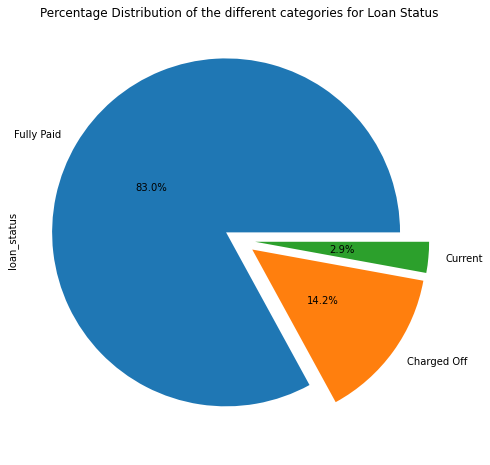

In [8]:
plt.figure(figsize=(8,8))
loan_data['loan_status'].value_counts().plot.pie(autopct="%.1f%%",pctdistance=0.5,explode=[0.09]*3)
plt.title('Percentage Distribution of the different categories for Loan Status')
plt.show()

## Data Cleaning

#### 1. Handling Missing Values:

- Check the rate of missing values in each column

In [9]:
# filter the columns to identify columns having missing data > 0
missing_data_columns = 100*(loan_data.loc[:,loan_data.isnull().sum() > 0].isnull().sum().sort_values(ascending = False))/len(loan_data)
missing_data_columns

total_il_high_credit_limit    100.000000
mo_sin_old_rev_tl_op          100.000000
bc_util                       100.000000
bc_open_to_buy                100.000000
total_bc_limit                100.000000
                                 ...    
collections_12_mths_ex_med      0.140998
revol_util                      0.125891
tax_liens                       0.098195
title                           0.027696
last_credit_pull_d              0.005036
Length: 68, dtype: float64

A total of 68 columns have varying percentage of missing records. Let's see the percentage and drop accordingly.

Check the kind of columns with 100% missing values and drop them

In [10]:
# filter columns having 100% missing data
print(missing_data_columns[missing_data_columns == 100])
print(len(missing_data_columns[missing_data_columns == 100]))

total_il_high_credit_limit        100.0
mo_sin_old_rev_tl_op              100.0
bc_util                           100.0
bc_open_to_buy                    100.0
total_bc_limit                    100.0
acc_open_past_24mths              100.0
inq_last_12m                      100.0
total_cu_tl                       100.0
inq_fi                            100.0
total_rev_hi_lim                  100.0
all_util                          100.0
max_bal_bc                        100.0
open_rv_24m                       100.0
open_rv_12m                       100.0
il_util                           100.0
total_bal_il                      100.0
mths_since_rcnt_il                100.0
open_il_24m                       100.0
open_il_12m                       100.0
open_il_6m                        100.0
open_acc_6m                       100.0
tot_cur_bal                       100.0
tot_coll_amt                      100.0
verification_status_joint         100.0
dti_joint                         100.0


A total of 54 columns (out of 68 as seen above) have 100% Nulls. Let's drop them.

In [11]:
# drop the columns with 100% missing data
loan_data.drop(missing_data_columns[missing_data_columns == 100].index, axis = 1, inplace = True)

In [12]:
# update the series by removing entries having 100% missing values
missing_data_columns = missing_data_columns[~(missing_data_columns == 100)]
missing_data_columns

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

In [13]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


Empty columns are removed from the dataset. Now re-check the rate of missing values in remaining columns 

In [14]:
# check the rate of missing values in remaning columns
missing_data_columns

next_pymnt_d                  97.129693
mths_since_last_record        92.985372
mths_since_last_delinq        64.662487
desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
dtype: float64

Drop columns with missing rate greater than 60%. Drop column 'desc' as it doesn't have any relevance to the current objective.

In [15]:
# drop columns next_pymnt_d, mths_since_last_record, mths_since_last_delinq and desc
loan_data.drop(missing_data_columns[:4].index, axis = 1, inplace = True)
missing_data_columns = missing_data_columns[4:]
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


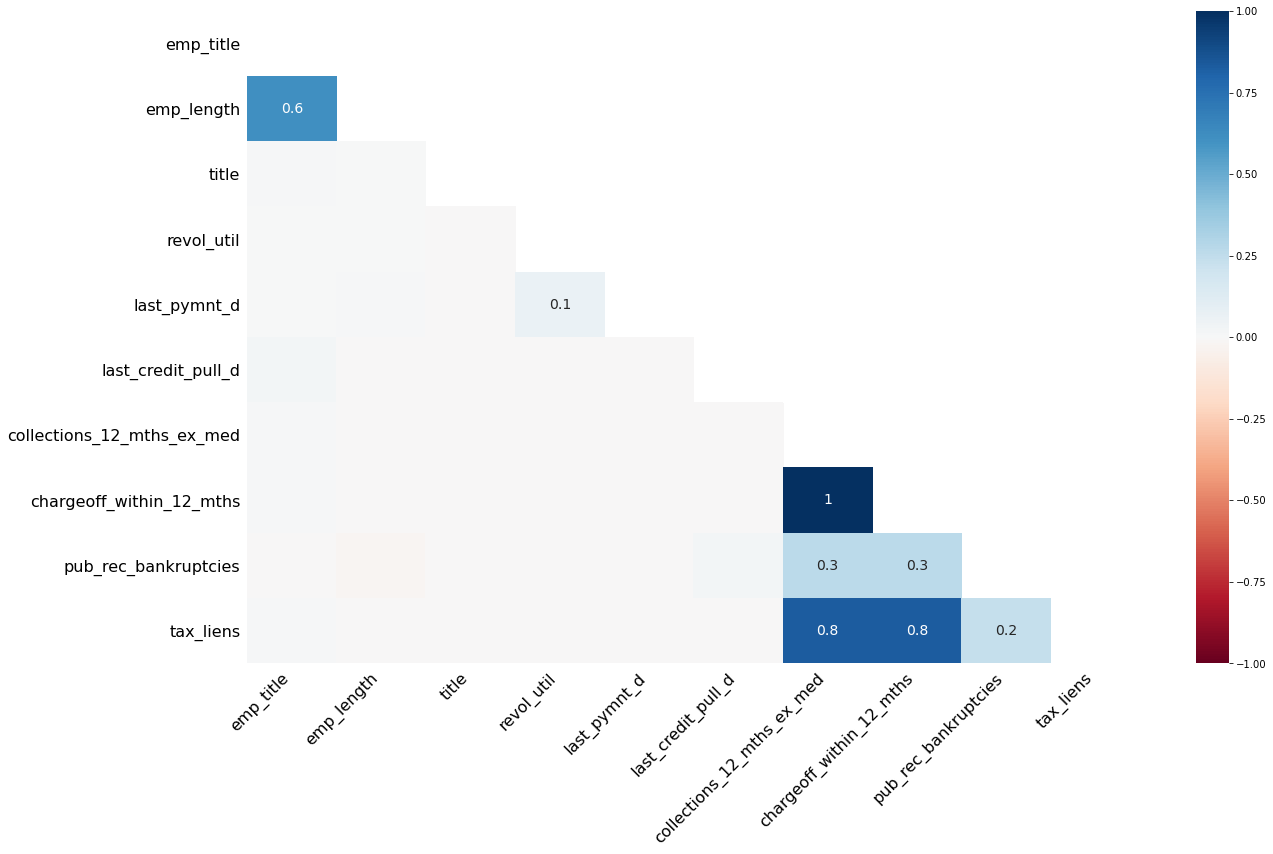

In [16]:
# visualise correlation between the number of missing values in columns
msno.heatmap(loan_data)

From the above heatmap, it's clear that if charge_off_within_12_months is empty then collections_12_mths_ex_med is also empty. Also, it is highly likely that tax_liens to be empty if collections_12_mths_ex_med or pub_rec_bankruptcies is empty.

Columns title, revol_util, last_payment_d,last_credit_pull_d are not relevant to the current objective. These parameters are not available at the time of loan application based on which LC can make a decision. Hence these columns can be dropped. collections_12_mths_ex_med can also be dropped as a loan goes into collections after chargeoff only. So this column is not necessary. By looking at the rate of missing data and the correlation matrix, we can decide to drop these columns.

In [17]:
# dropping columns which are not relevant for the analysis
loan_data.drop(['last_pymnt_d','collections_12_mths_ex_med','revol_util','title','last_credit_pull_d'],axis = 1, inplace = True)

Check the number of missing values in each row.

In [18]:
# check rate of missing values in rows
loan_data.isnull().sum(axis = 1).sort_values(ascending = False)

39714    4
39659    4
39660    4
39715    4
39706    4
        ..
24810    0
24809    0
24808    0
24807    0
19858    0
Length: 39717, dtype: int64

There aren't any rows having high rate of missing data. So let's try to handle the missing data in remaining columns and then recheck missing values in rows. Coulmns with missing entries are chargeoff_within_12_mths,pub_rec_bankruptcies, tax_liens, emp_title,emp_length.

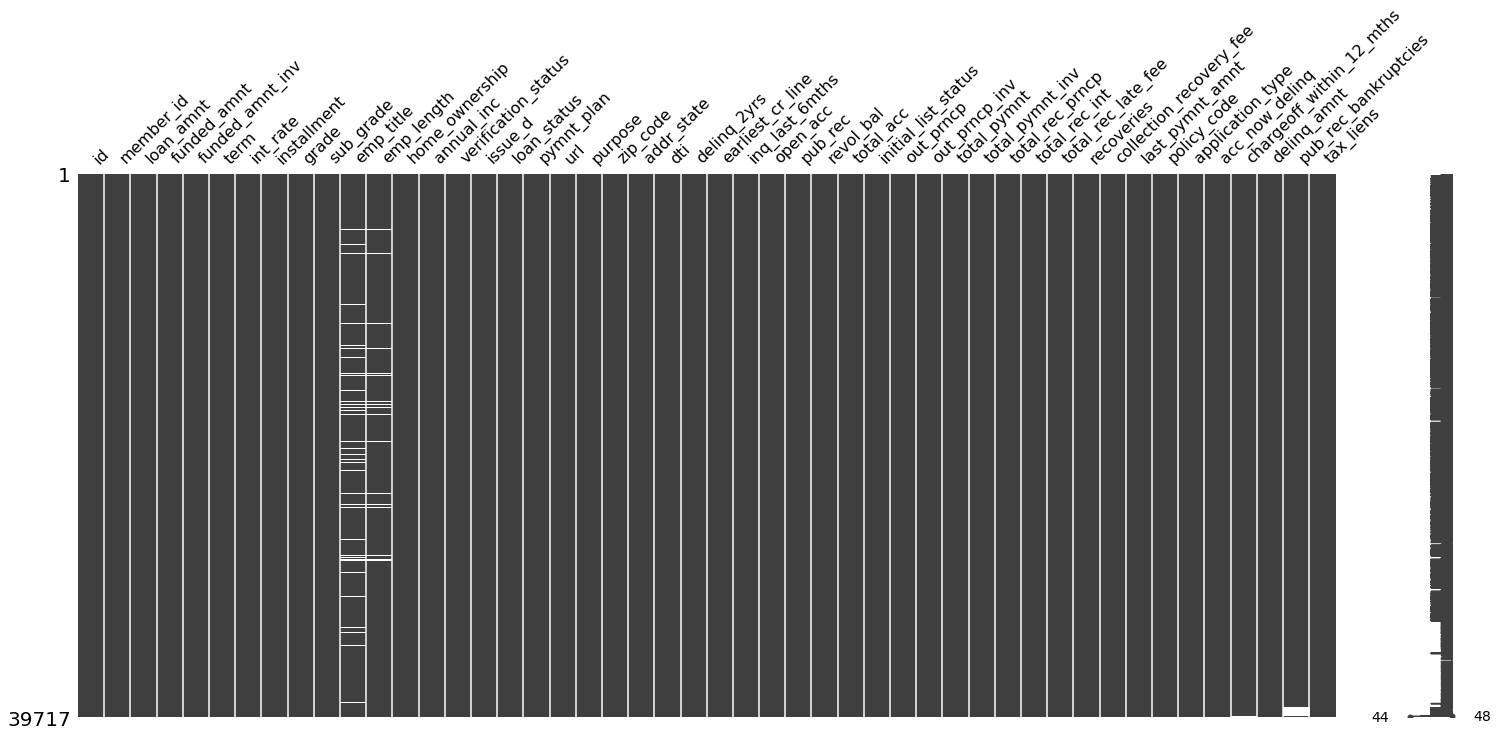

In [19]:
# check the distribution of missing data in columns
msno.matrix(loan_data)

emp_length is vital to the analysis. Hence this column can't be dropped. However, missing values can be dropped or imputed. There is only 2.7% missing data in emp_length column. So it's safe to drop these rows.

In [20]:
# update the master dataset by removing rows having missing values in it.
loan_data = loan_data[~(loan_data.emp_length.isnull())]

In [21]:
# recheck the rate of missing data in dataset
print(loan_data.shape)
loan_data.isnull().sum().sort_values(ascending = False)

(38642, 48)


emp_title                   1440
pub_rec_bankruptcies         697
chargeoff_within_12_mths      56
tax_liens                     39
home_ownership                 0
addr_state                     0
zip_code                       0
purpose                        0
url                            0
pymnt_plan                     0
loan_status                    0
issue_d                        0
verification_status            0
annual_inc                     0
member_id                      0
dti                            0
sub_grade                      0
grade                          0
installment                    0
int_rate                       0
term                           0
funded_amnt_inv                0
funded_amnt                    0
loan_amnt                      0
emp_length                     0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
delinq_amnt                    0
acc_now_delinq                 0
applicatio

- Checking how we can impute the remaining columns with missing values - 'emp_title', 'pub_rec_bankruptcies', 'chargeoff_within_12_mths', 'tax_liens' .

1. 'emp_title':

In [22]:
# check the type of data in emp_title
loan_data.emp_title.value_counts()

US Army                                   134
Bank of America                           109
IBM                                        66
AT&T                                       59
Kaiser Permanente                          56
                                         ... 
fvrmc                                       1
SAS Institute                               1
Civic Center, City of Marion, Illinois      1
roys restaurant                             1
NCI Information Systems Inc.                1
Name: emp_title, Length: 28775, dtype: int64

Imputing with mode of emp_title is not a suitable way as the difference in frequently observed values is very less.

2. 'chargeoff_within_12_mths':

In [23]:
# check the type of data in chargeoff_within_12_mths
loan_data.chargeoff_within_12_mths.value_counts()

0.0    38586
Name: chargeoff_within_12_mths, dtype: int64

The only entry in chargeoff_within_12_mths is 0. Thus, this column won't contribute anything to the analysis, hence this column can be dropped

In [24]:
# drop column chargeoff_within_12_mths as it is having same value for all loan records
loan_data.drop('chargeoff_within_12_mths', axis = 1, inplace = True)

C:\Users\veena\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3. 'tax_liens':

In [25]:
# check the type of data in tax_liens
loan_data.tax_liens.value_counts()

0.0    38603
Name: tax_liens, dtype: int64

The content of the column tax_liens is 0 for all entries. So this column can also be dropped as it won't contribute to the analysis.

In [26]:
# drop column tax_liens as it is having same value for all loan records
loan_data.drop('tax_liens',axis = 1, inplace = True)

In [27]:
# check the size of the dataset
loan_data.shape

(38642, 46)

4. 'pub_rec_bankruptcies':

In [28]:
# check the type of data in pub_rec_bankruptcies
loan_data.pub_rec_bankruptcies.value_counts()

0.0    36375
1.0     1563
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Here, if we want to impute pub_rec_bankruptcies instead of dropping missing entries, mode is a good option. 

- Checking the unique categories in emp_title column:

In [29]:
# check the kind of data available in emp_title column
loan_data.emp_title.unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

Remove the rows with missing values in emp_title and pub_rec_bankruptcies column. Since the rate of such rows is less, dropping them won't reduce the dataset size significatntly.

In [30]:
# delete rows having NaN in columns emp_title column
loan_data.dropna(axis = 0, subset = ['emp_title','pub_rec_bankruptcies'],inplace = True)

<ipython-input-30-21b60ac69b7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data.dropna(axis = 0, subset = ['emp_title','pub_rec_bankruptcies'],inplace = True)


- Checking the current Null counts after the cleaning process:

In [31]:
# check total number of missing data in the dataset
loan_data.isnull().sum().sum()

0

In [32]:
# check the size of updated dataset
loan_data.shape

(36548, 46)

- Handling Missing Value: Conclusion:

We donot have any more nulls that is missing values in the entire dataset has been handled now. We have dropped all the columns having NUll records above 60%. Also we dropped rows that have missing values. Since the percentage of such rows are quite less it will not impact the overall analysis.

#### 2. Removing unnecessary columns:

In [33]:
# checking remaining columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'policy_code', 'application_type', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

Following columns are not available at the time of loan application, thus, they do not have any relevance to the case study. 



url, delinq_2yrs, earliest_cr_line, open_acc, pub_rec, revol_bal, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_amnt, policy_code, inq_last_6mths, application_type, funded_amnt, funded_amnt_inv, pymnt_plan, emp_title

In [34]:
# drop irrelevant columns
loan_data.drop([ 'emp_title','url', 'delinq_2yrs', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code','inq_last_6mths','application_type', 'funded_amnt', 'funded_amnt_inv','pymnt_plan'], axis = 1, inplace = True)

In [35]:
# check the size of updated dataset
loan_data.shape

(36548, 22)

In [36]:
# check remaining columns
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'zip_code',
       'addr_state', 'dti', 'initial_list_status', 'acc_now_delinq',
       'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [37]:
# check how many unique applicants are there in the dataset
print(loan_data.member_id.nunique())
loan_data.id.nunique()

36548


36548

All the loan data available in the dataset corresponds to unique users. ie. none of the users has made multiple loan applications. Columns 'id' and 'member_id' indicates the uniqueness of the loan application. Hence, these 2 columns can be removed.

In [38]:
# drop columns member_id and id
loan_data.drop(['member_id','id'], axis = 1, inplace = True)

- Removing unnecessary columns: Conclusion:

We have dropped all the redundant columns. The columns present now will be needed in the analysis.

#### 3. Clean the data by analysing datatype of columns

Since the target is to identify applicants who are potential defaulters, we can remove rows corresponding to loan_status 'Current'. 'Current' indicates that they are neither fully paid nor defaulted.

In [39]:
# check the various entries in column loan_status
loan_data.loan_status.value_counts()

Fully Paid     30463
Charged Off     5019
Current         1066
Name: loan_status, dtype: int64

There are only 3 categories in column loan_status. Rows corresponding to 'Current' can be removed as they do not contribute to the analysis.

In [40]:
# update the datset to contain only charged off or fully paid loan entries
loan_data = loan_data[loan_data.loc[:,'loan_status'] != 'Current']

In [41]:
#Final Dataset :
loan_data.shape

(35482, 20)

Check the consistency of datatype throughout the column. This will help us to identify any unexpected kind of information present in a column.

In [42]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 1 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35482 non-null  int64  
 1   term                  35482 non-null  object 
 2   int_rate              35482 non-null  object 
 3   installment           35482 non-null  float64
 4   grade                 35482 non-null  object 
 5   sub_grade             35482 non-null  object 
 6   emp_length            35482 non-null  object 
 7   home_ownership        35482 non-null  object 
 8   annual_inc            35482 non-null  float64
 9   verification_status   35482 non-null  object 
 10  issue_d               35482 non-null  object 
 11  loan_status           35482 non-null  object 
 12  purpose               35482 non-null  object 
 13  zip_code              35482 non-null  object 
 14  addr_state            35482 non-null  object 
 15  dti                

- Columns 'term', 'int_rate', 'sub_grade', 'emp_length' have to be treated to standardise data.

1. Preparing the content in column 'term':

In [43]:
# check the kind of entries in column 'term'
loan_data.term.value_counts()

 36 months    26471
 60 months     9011
Name: term, dtype: int64

Treat the content of column 'terms' to contain either 36 or 60.

In [44]:
# remove 'months' from each entry in 'term' column and convert it to integer format
loan_data['term'] = loan_data.term.apply(lambda x:int(x.replace('months','')))

In [45]:
# recheck the content of column 'term'
loan_data.term

1        60
3        36
5        36
6        60
7        36
         ..
39551    36
39562    36
39623    36
39666    36
39680    36
Name: term, Length: 35482, dtype: int64

2. Preparing the content in column 'int_rate':

In [46]:
# check the content of 'int_rate'
loan_data.int_rate

1        15.27%
3        13.49%
5         7.90%
6        15.96%
7        18.64%
          ...  
39551    10.91%
39562    10.28%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 35482, dtype: object

In [47]:
# remove '%' from the column content
loan_data.int_rate = loan_data.int_rate.apply(lambda x: float(x.replace('%','')))

In [48]:
# recheck the content of column 'int_rate'
loan_data.int_rate

1        15.27
3        13.49
5         7.90
6        15.96
7        18.64
         ...  
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 35482, dtype: float64

3. Subgrade should be between 1 to 5. Standardise the column accordingly.

In [49]:
#check the type of data in sub_grade
loan_data.sub_grade.value_counts()

A4    2662
B3    2590
A5    2491
B5    2447
B4    2254
C1    1877
B2    1826
C2    1802
A3    1632
B1    1616
C3    1377
A2    1357
D2    1190
C4    1099
C5    1058
D3    1028
A1    1005
D1     855
D4     853
D5     769
E1     691
E2     573
E3     488
E4     395
E5     353
F1     294
F2     216
F3     160
F4     138
F5     100
G1      91
G2      75
G4      54
G3      41
G5      25
Name: sub_grade, dtype: int64

Compare the content of sub_grade with content of grade column to ensure data cosnistency. That means Grade 'A' has sub_grades as 'A1, A2, A3, A4, A5'. This says the first letter of Grade should match with the first letter of sub_grade, which comes under it.

In [50]:
# check the first character of sub_grade is equal to the corresponding value in grade column
(loan_data.sub_grade.apply(lambda x:x[0]) == loan_data.grade).sum()

35482

All the sub_grade values are correctly matched with the correct corresponding Grade Value.

In [51]:
# recheck the remaining columns and it's content
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 1 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35482 non-null  int64  
 1   term                  35482 non-null  int64  
 2   int_rate              35482 non-null  float64
 3   installment           35482 non-null  float64
 4   grade                 35482 non-null  object 
 5   sub_grade             35482 non-null  object 
 6   emp_length            35482 non-null  object 
 7   home_ownership        35482 non-null  object 
 8   annual_inc            35482 non-null  float64
 9   verification_status   35482 non-null  object 
 10  issue_d               35482 non-null  object 
 11  loan_status           35482 non-null  object 
 12  purpose               35482 non-null  object 
 13  zip_code              35482 non-null  object 
 14  addr_state            35482 non-null  object 
 15  dti                

4. Checking column 'installment':

In [52]:
# check the content of column installment
loan_data.installment

1         59.83
3        339.31
5        156.46
6        170.08
7        109.43
          ...  
39551    404.62
39562    155.52
39623    301.04
39666    507.46
39680     99.44
Name: installment, Length: 35482, dtype: float64

Column installment indicates the monthly payment that has to be made by the borrower if loan originates. Since we are aleady considering interest rate and term, the value of this column can be inferred from the other 2 columns mentioned. So, this column can be dropped. 

In [53]:
#dropping column installemnt as it would be a redundant parameter
loan_data.drop('installment', axis = 1, inplace = True)

5. Preparing the content in column 'emp_length':

In [54]:
# check the content of column emp_length to standardise the content of it
loan_data.emp_length.value_counts()

10+ years    8038
2 years      4094
< 1 year     3997
3 years      3844
4 years      3221
5 years      3058
1 year       2975
6 years      2067
7 years      1642
8 years      1366
9 years      1180
Name: emp_length, dtype: int64

Modify the content of emp_length to contain float value by removing the string content from it. Let's consider 10+years as 10, <1 year as 0.5 year.

In [55]:
# remove 'years' and 'year' from the column emp_length
loan_data.emp_length = loan_data.emp_length.apply(lambda x:x.replace('years','').replace('year',''))

In [56]:
# replace 10+ with 10 and <1 with 0.5
loan_data.emp_length = loan_data.emp_length.apply(lambda x: 0.5 if x =='< 1 ' else(10 if x == '10+ ' else float(x)))

In [57]:
loan_data.emp_length.value_counts()

10.0    8038
2.0     4094
0.5     3997
3.0     3844
4.0     3221
5.0     3058
1.0     2975
6.0     2067
7.0     1642
8.0     1366
9.0     1180
Name: emp_length, dtype: int64

6. Checking the content of column 'home_ownership':

In [58]:
# check the uniqueness of column 'home_ownership' to ensure there is no wrong data due to lack of data standardisation
loan_data.home_ownership.value_counts()

RENT        17143
MORTGAGE    15727
OWN          2516
OTHER          96
Name: home_ownership, dtype: int64

7. Checking the content of column 'verification_status':

In [59]:
# check the uniqueness of column home_ownership to ensure the consistency in data
loan_data.verification_status.value_counts()

Not Verified       14900
Verified           11390
Source Verified     9192
Name: verification_status, dtype: int64

8. Check the content of column 'purpose' to validate unique values:

In [60]:
# check the uniqueness of column purpose to ensure the consistency in data
loan_data.purpose.value_counts()

debt_consolidation    16952
credit_card            4630
other                  3484
home_improvement       2620
major_purchase         1983
car                    1397
small_business         1359
wedding                 872
medical                 624
moving                  525
vacation                333
house                   332
educational             283
renewable_energy         88
Name: purpose, dtype: int64

9. Analyse the content of 'zip_code' and 'addr_state':

In [61]:
# check the uniqueness of column purpose to ensure the consistency in data
loan_data.zip_code.value_counts()

100xx    527
945xx    495
112xx    468
606xx    468
070xx    426
        ... 
677xx      1
373xx      1
353xx      1
414xx      1
673xx      1
Name: zip_code, Length: 805, dtype: int64

In [62]:
# remove column zip_code as it is not a meaningful parameter to check the chances of loan default and column addr_state would help us in identifying any pattern w.r.t geography
loan_data.drop('zip_code',axis = 1, inplace = True)

In [63]:
#Checking 'addr_state':
loan_data.addr_state.value_counts()

CA    6419
NY    3396
FL    2541
TX    2466
NJ    1675
IL    1383
PA    1378
VA    1264
GA    1255
MA    1182
OH    1101
MD     955
AZ     762
WA     720
CO     682
NC     675
CT     655
MI     642
MO     612
MN     558
NV     443
SC     422
AL     399
OR     398
LA     389
WI     388
KY     294
OK     273
KS     234
UT     229
AR     217
DC     205
RI     185
NM     163
WV     158
HI     154
NH     148
DE     106
WY      75
AK      73
MT      71
SD      56
VT      47
MS      18
TN      10
ID       3
IA       1
IN       1
NE       1
Name: addr_state, dtype: int64

10. Checking the uniqueness of column 'initial_list_status', 'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies':

In [64]:
# check the uniqueness of column 'initial_list_status' to ensure the consistency in data
print(loan_data.initial_list_status.value_counts())

# check the content of column 'acc_now_delinq' to ensure the consistency in data
print(loan_data.acc_now_delinq.value_counts())

# check the content of column 'delinq_amnt' 
print(loan_data.delinq_amnt.value_counts())

# check the content of column 'pub_rec_bankruptcies' 
print(loan_data.pub_rec_bankruptcies.value_counts())

f    35482
Name: initial_list_status, dtype: int64
0    35482
Name: acc_now_delinq, dtype: int64
0    35482
Name: delinq_amnt, dtype: int64
0.0    34006
1.0     1471
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


All the entries in each of the columns 'initial_list_status', 'delinq_amnt' and 'acc_now_delinq' are same. So these columns can be dropped.

In [65]:
# drop columns 'initial_list_status','delinq_amnt','acc_now_delinq 
loan_data.drop(['initial_list_status','delinq_amnt','acc_now_delinq'], axis = 1, inplace = True)

11. Convert the target variable 'loan_status' into ento 0 or 1. 

0 representing Fully Paid and 1 representing Charged Off

In [66]:
# Modify the content of target column loan_status
loan_data.loan_status = loan_data.loan_status.apply(lambda x: 0 if x == 'Fully Paid' else 1)

In [67]:
#Check the content of column 'loan_status'
loan_data.loan_status.value_counts()

0    30463
1     5019
Name: loan_status, dtype: int64

With this we have finished the Data Cleaning and Manipulation Stage.

## Data Analysis

Now, recheck the columns, especially quantitative variables, to understand the spread of data to identify invalid entries.

In [68]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 1 to 39680
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             35482 non-null  int64  
 1   term                  35482 non-null  int64  
 2   int_rate              35482 non-null  float64
 3   grade                 35482 non-null  object 
 4   sub_grade             35482 non-null  object 
 5   emp_length            35482 non-null  float64
 6   home_ownership        35482 non-null  object 
 7   annual_inc            35482 non-null  float64
 8   verification_status   35482 non-null  object 
 9   issue_d               35482 non-null  object 
 10  loan_status           35482 non-null  int64  
 11  purpose               35482 non-null  object 
 12  addr_state            35482 non-null  object 
 13  dti                   35482 non-null  float64
 14  pub_rec_bankruptcies  35482 non-null  float64
dtypes: float64(5), int6

##### UNIVARIATE ANALYSIS:

1. 'Loan Amount' Column:

In [69]:
# check the distribution, mean and median of variable loan_amnt
loan_data.loan_amnt.describe()

count    35482.000000
mean     11120.439237
std       7327.883153
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

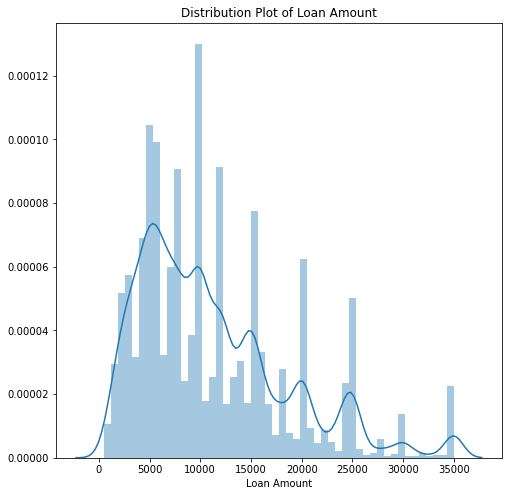

In [70]:
#check the density plot of loan_amnt
plt.figure(figsize = (8,8))
sns.distplot(loan_data['loan_amnt'])
plt.xlabel('Loan Amount')
plt.title('Distribution Plot of Loan Amount')
plt.show()

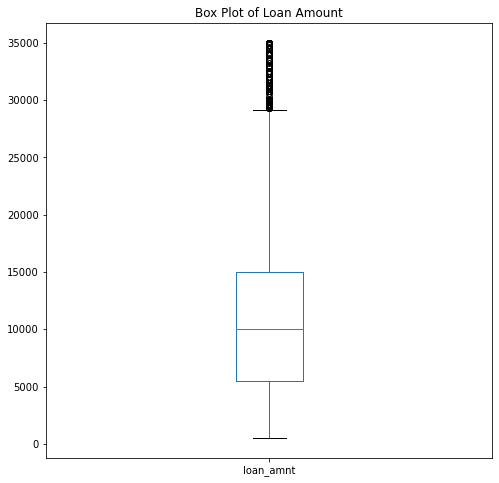

In [71]:
# check the distribution of variable loan_amnt
plt.figure(figsize = (8,8))
loan_data.loan_amnt.plot(kind = 'box')
plt.title('Box Plot of Loan Amount')
plt.show()

As we can observe from box plot and the details gotten in describe function, it is clear that there are a few outliers. But by analysing the median, mean and distribution plot, we can come to the conclusion that the presence of outliers is not very high. Hence it's not necesssary to remove them for our current analysis.

The majority of the loan amount falls between 5k-15k USD with median at 10k USD.

2. 'Interest Rate' Column:

In [72]:
# check the distribution of int_rate to eliminate any possibility of incorrect data in it
loan_data.int_rate.describe()

count    35482.000000
mean        11.992084
std          3.703821
min          5.420000
25%          8.940000
50%         11.860000
75%         14.540000
max         24.400000
Name: int_rate, dtype: float64

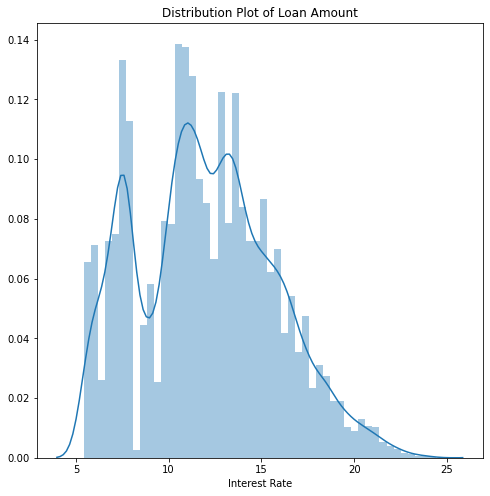

In [73]:
# check the distribution of variable int_rate
plt.figure(figsize = (8,8))
sns.distplot(loan_data['int_rate'])
plt.xlabel('Interest Rate')
plt.title('Distribution Plot of Loan Amount')
plt.show()

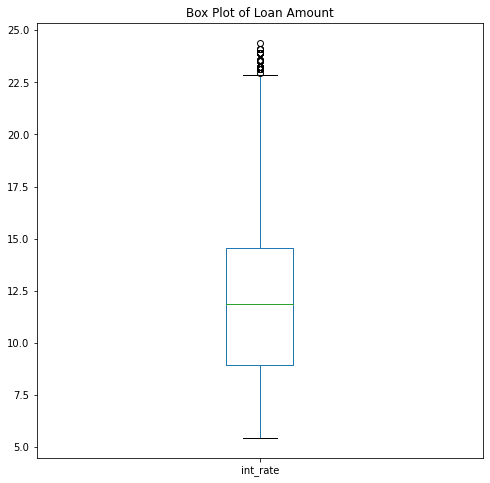

In [74]:
plt.figure(figsize = (8,8))
loan_data.int_rate.plot.box()
plt.title('Box Plot of Loan Amount')
plt.show()

- Median and Mean are in the same range, indicating very less outliers in data.
- Median rate is 11.86% and Mean rate is 11.99%.

3. 'Annual Income' Column:

In [75]:
# check the content of column annual_inc
loan_data.annual_inc.describe()

count    3.548200e+04
mean     6.902437e+04
std      6.392552e+04
min      4.000000e+03
25%      4.124625e+04
50%      6.000000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

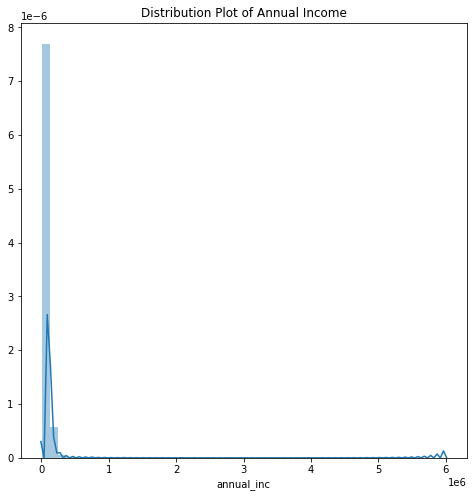

In [76]:
# check the distribution of variable 'annual_inc':
plt.figure(figsize = (8,8))
sns.distplot(loan_data['annual_inc'])
plt.xlabel('annual_inc')
plt.title('Distribution Plot of Annual Income')
plt.show()

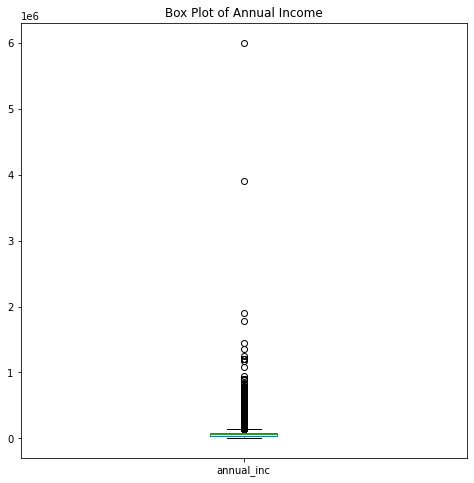

In [77]:
plt.figure(figsize = (8,8))
loan_data.annual_inc.plot.box()
plt.title('Box Plot of Annual Income')
plt.show()

- Annual_inc contains valid data. The mininum income given is greater than 0. 
- Also, mean and median are in the nearby range with mean value being 69K USD and median being 60k USD.

4. 'DTI' Column:

In [78]:
# check the content of column dti
loan_data.dti.describe()

count    35482.000000
mean        13.397194
std          6.638803
min          0.000000
25%          8.310000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

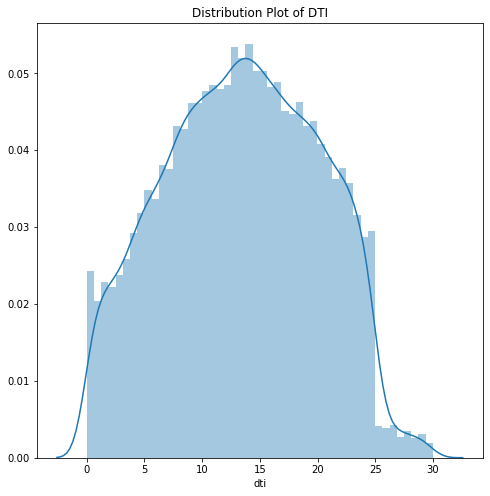

In [79]:
# check the distribution of column dti
plt.figure(figsize = (8,8))
sns.distplot(loan_data['dti'])
plt.xlabel('dti')
plt.title('Distribution Plot of DTI')
plt.show()

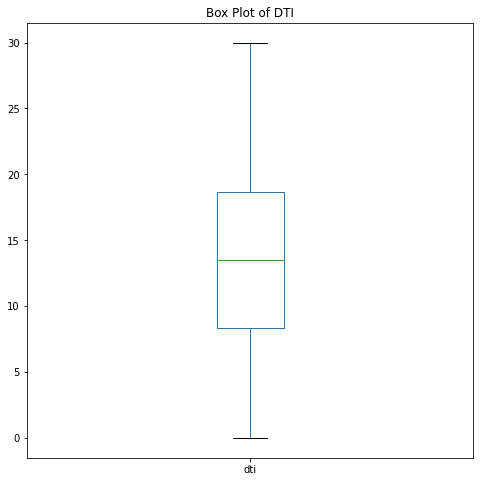

In [80]:
plt.figure(figsize = (8,8))
loan_data.dti.plot.box()
plt.title('Box Plot of DTI')
plt.show()

Minimum value of dti is 0. Let's check what are the scenarios where dti is 0

In [81]:
# check the loan details where dti is 0
loan_data[loan_data.dti == 0]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
2938,15000,36,7.51,A,A3,9.0,MORTGAGE,65004.0,Not Verified,Nov-11,0,other,MO,0.0,0.0
3208,3500,36,16.29,D,D1,3.0,MORTGAGE,50000.0,Not Verified,Nov-11,1,major_purchase,NY,0.0,0.0
4086,6500,36,10.65,B,B2,2.0,MORTGAGE,56650.0,Not Verified,Nov-11,0,debt_consolidation,MA,0.0,0.0
4545,5150,36,7.90,A,A4,7.0,RENT,68000.0,Verified,Nov-11,0,debt_consolidation,AR,0.0,0.0
4558,6000,36,6.03,A,A1,0.5,OWN,21600.0,Source Verified,Oct-11,0,car,MI,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38476,4000,36,8.32,A,A4,6.0,OWN,66480.0,Not Verified,Aug-08,0,home_improvement,LA,0.0,0.0
38553,4950,36,7.68,A,A2,1.0,MORTGAGE,35000.0,Not Verified,Jul-08,0,other,NY,0.0,0.0
38557,3000,36,8.00,A,A3,1.0,RENT,93000.0,Not Verified,Jul-08,0,other,NY,0.0,0.0
38656,5500,36,9.76,B,B2,0.5,RENT,62400.0,Not Verified,Jun-08,0,wedding,IL,0.0,0.0


There are 147 entries where dti is 0. dti indicates debt (except mortgage) to income ratio. So 0 is a possible value.

5. 'Issue Date' Column:

 - Segregate month and year from issue_d for further analysis.

In [82]:
loan_data['issue_d']=loan_data['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'])
loan_data['issue_year'] = loan_data['issue_d'].dt.year
loan_data['issue_month'] = loan_data['issue_d'].dt.month

<ipython-input-82-3178dbc314fc>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  loan_data['issue_d']=loan_data['issue_d'].apply(lambda x: pd.datetime.strptime(x, '%b-%y').strftime('%m-%Y'))


In [83]:
#Dropping the original columm 'issue_d' after creating separate variables for issue_month and issue_year:
loan_data.drop('issue_d', axis = 1, inplace = True)

Now, let's check the final form of dataset 

In [84]:
print(loan_data.shape)
loan_data.head(10)

(35482, 16)


,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month
1,2500,60,15.27,C,C4,0.5,RENT,30000.0,Source Verified,1,car,GA,1.00,0.0,2011,12
3,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,0,other,CA,20.00,0.0,2011,12
5,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,0,wedding,AZ,11.20,0.0,2011,12
6,7000,60,15.96,C,C5,8.0,RENT,47004.0,Not Verified,0,debt_consolidation,NC,23.51,0.0,2011,12
7,3000,36,18.64,E,E1,9.0,RENT,48000.0,Source Verified,0,car,CA,5.35,0.0,2011,12
9,5375,60,12.69,B,B5,0.5,RENT,15000.0,Verified,1,other,TX,18.08,0.0,2011,12
10,6500,60,14.65,C,C3,5.0,OWN,72000.0,Not Verified,0,debt_consolidation,AZ,16.12,0.0,2011,12
11,12000,36,12.69,B,B5,10.0,OWN,75000.0,Source Verified,0,debt_consolidation,CA,10.78,0.0,2011,12
12,9000,36,13.49,C,C1,0.5,RENT,30000.0,Source Verified,1,debt_consolidation,VA,10.08,0.0,2011,12
13,3000,36,9.91,B,B1,3.0,RENT,15000.0,Source Verified,0,credit_card,IL,12.56,0.0,2011,12


From 111 columns we are now down to 16 most important columns for analysis.

- Univariate Analysis on Numerical Columns:

##### Plotting the pair plot to see how the scatter plots looks for the numerical variables:

C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


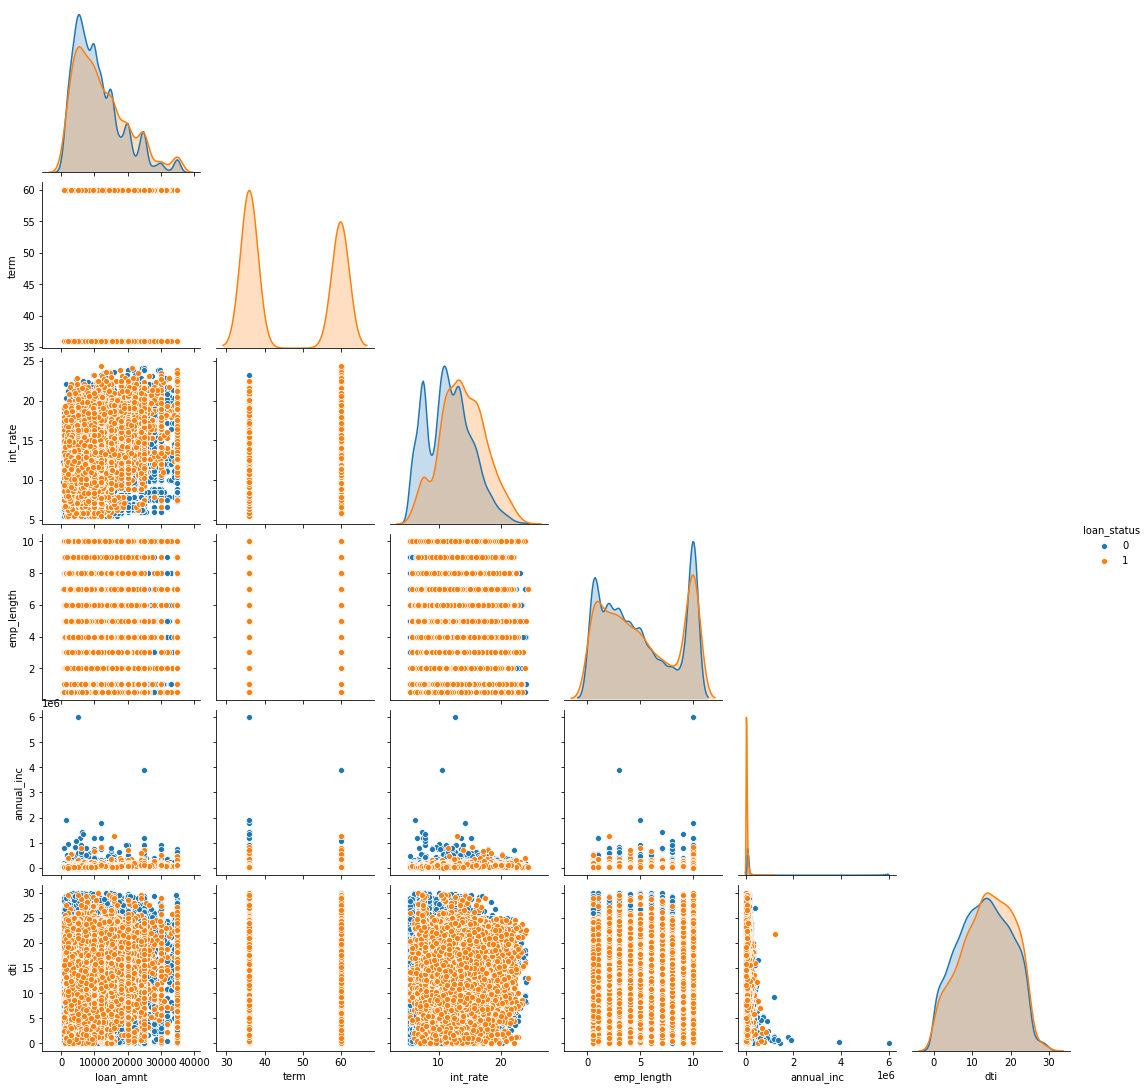

In [85]:
#plot distribution of continuous features
numerical_features = ['loan_amnt','term','int_rate','emp_length','annual_inc','loan_status','dti']
sns.pairplot(loan_data[numerical_features], hue="loan_status", corner=True)
plt.show()

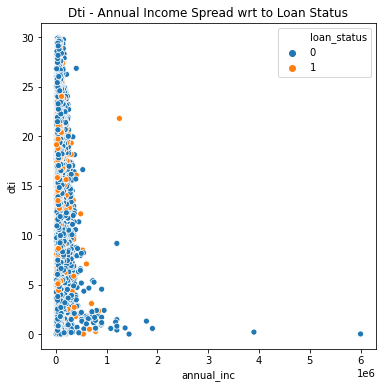

In [86]:
plt.figure(figsize = (6,6))
sns.scatterplot(data=loan_data, x = 'annual_inc', y = 'dti' ,hue="loan_status")
plt.title('Dti - Annual Income Spread wrt to Loan Status')
plt.show()

There is no clear demarcation between the records for the either classes from this pairplot. Both the classes are very much overlapped.

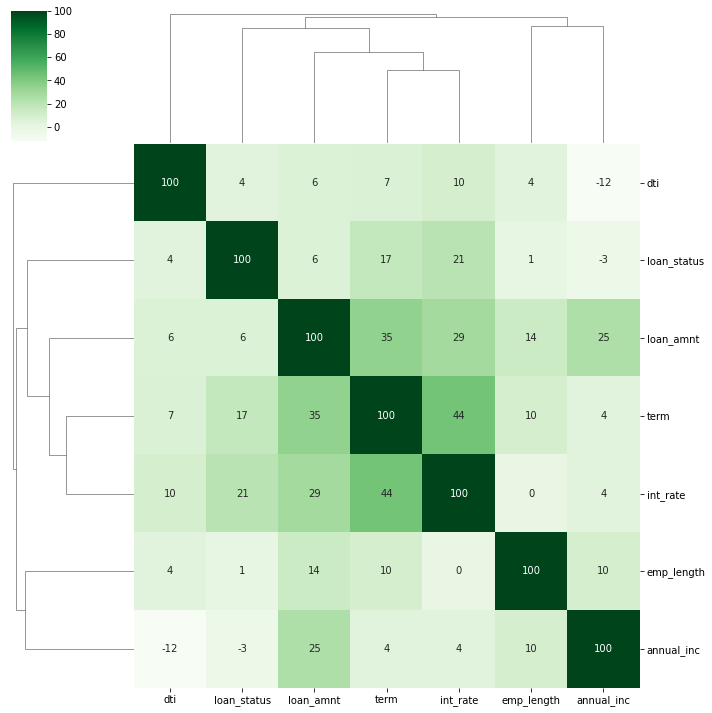

In [87]:
#check the correlation matrix for possible relation between quantitative variables
corr = loan_data[numerical_features].corr().mul(100).astype(int)
sns.clustermap(data=corr, annot=True, fmt='d', cmap='Greens').savefig('cluster_image.png')

###### Observations:

- We see that the cluster 'loan_amnt', 'term', 'int_rate' are quite correlated with one another. Let's understand the behavior of these variable more closely later.



- 'Annual Income' and 'DTI' are negatively correlated meaning the rise of one decreases the other.



- 'loan_status' is more positvely correlated with 'term' and 'int_rate' than with others.


- 'loan_status' is negatively correlated with 'annual_inc'. That means the rise of one decreases the other.



##### Lets check the relationship of these numerical variables with the target column i.e. 'loan_status':

In [88]:
numerical_features.remove('loan_status')

In [89]:
#Define a function to calculate and do jointplot to see the linear relationship between variables  
def univariate_numerical(num_list):
    for num in num_list:
        plt.figure(figsize=(14,5))
        sns.set(style = 'darkgrid')
        corr1, _ = pearsonr(loan_data[num], loan_data['loan_status'])
        corr2, _ = spearmanr(loan_data[num], loan_data['loan_status'])
        print('Pearsons correlation: {0} for {1}'.format(round(corr1,3),num))
        print('Spearmans correlation: {0} for {1}'.format(round(corr2,3),num))
        sns.jointplot(x=num,y='loan_status',data = loan_data,kind='reg')
        plt.xlabel(num.upper())
        plt.ylabel('Count')
        plt.xticks(rotation = 45)
        plt.show()

Pearsons correlation: 0.061 for loan_amnt
Spearmans correlation: 0.05 for loan_amnt


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

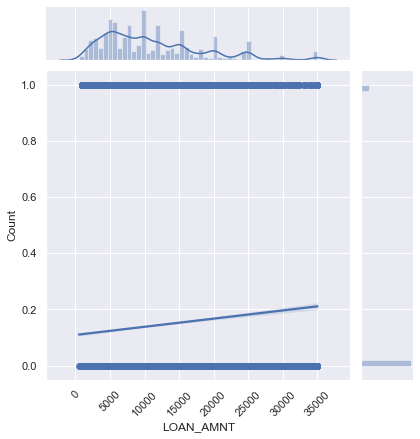

Pearsons correlation: 0.178 for term
Spearmans correlation: 0.178 for term


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

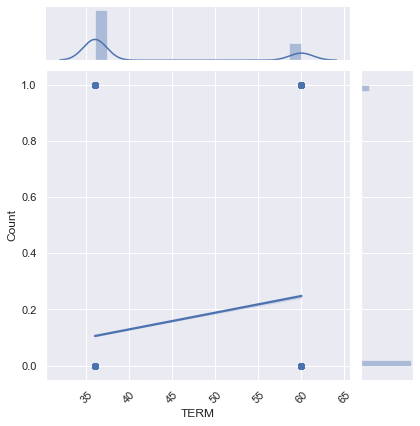

Pearsons correlation: 0.213 for int_rate
Spearmans correlation: 0.205 for int_rate


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

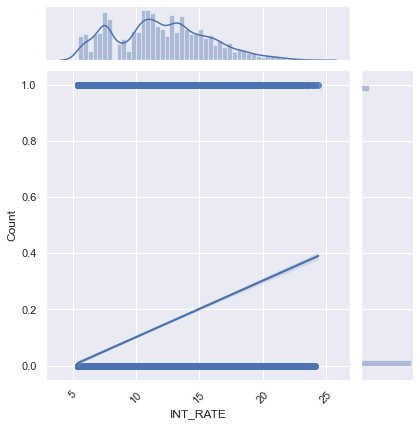

Pearsons correlation: 0.018 for emp_length
Spearmans correlation: 0.018 for emp_length


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

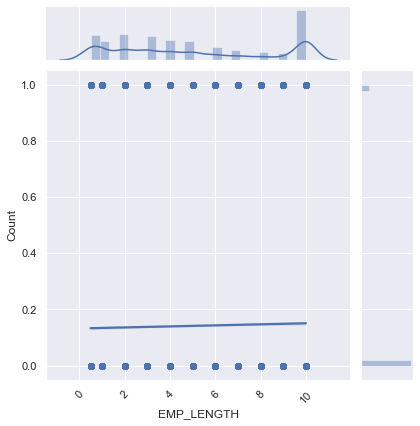

Pearsons correlation: -0.04 for annual_inc
Spearmans correlation: -0.07 for annual_inc


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

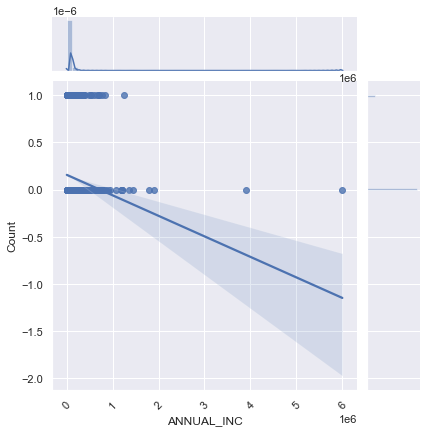

Pearsons correlation: 0.045 for dti
Spearmans correlation: 0.046 for dti


C:\Users\veena\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


<Figure size 1008x360 with 0 Axes>

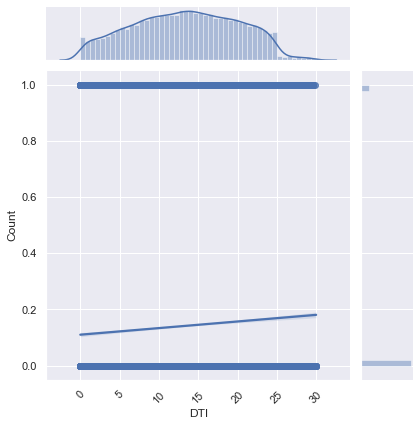

In [90]:
univariate_numerical(numerical_features)

##### Observations:
- There aren't any strong relationship between the quantitative variables. 
- The numerical variables are linearly related with the target.

- Univariate Analysis on Categorical Columns:

In [91]:
categorical_features = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose',
                        'addr_state','pub_rec_bankruptcies']

In [92]:
# Define a function to plot countplot for all categorical features to do univariate analysis
def plot_categorical_features(cat_list):
    for cat in cat_list:
        plt.figure(figsize=(14,5))
        sns.set(style = 'darkgrid')
        cat_val = loan_data[cat].value_counts()
        cat_count = loan_data[cat].value_counts().count()
        sns.countplot(x=cat, data = loan_data,order = loan_data[cat].value_counts().head(12).index)
        if cat_count > 12:
            r1 = 12
        else:
            r1 = cat_val.shape[0]
        for i in range(r1):
            range_count = cat_val[i]
            per = round(((range_count*100)/loan_data.shape[0]),2)
            percent = '{}%'.format(per)
            plt.text(i,range_count,percent)
        plt.xlabel(cat.upper())
        plt.ylabel('Count')
        plt.xticks(rotation = 45)
        plt.title('Percentage Distribution of '+cat.upper()+' field')
        plt.show()

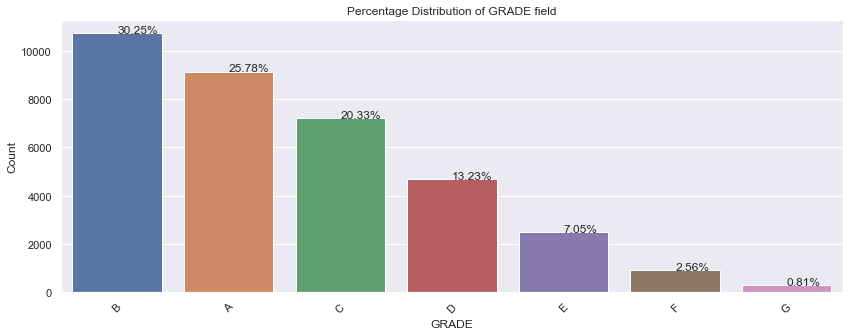

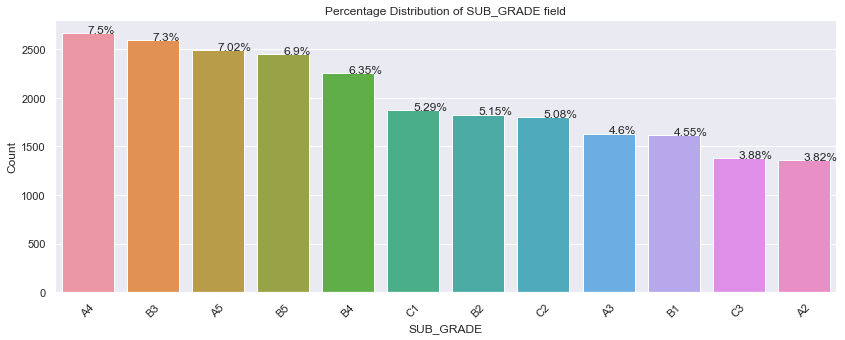

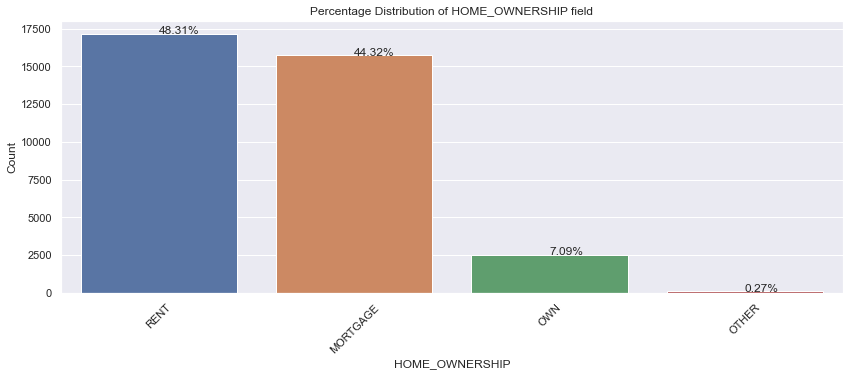

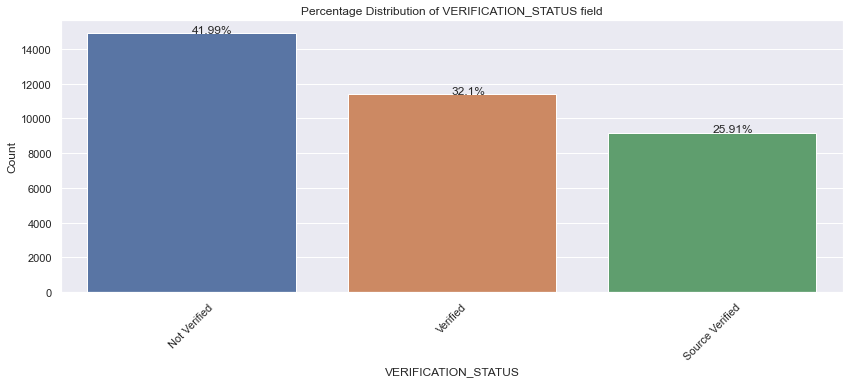

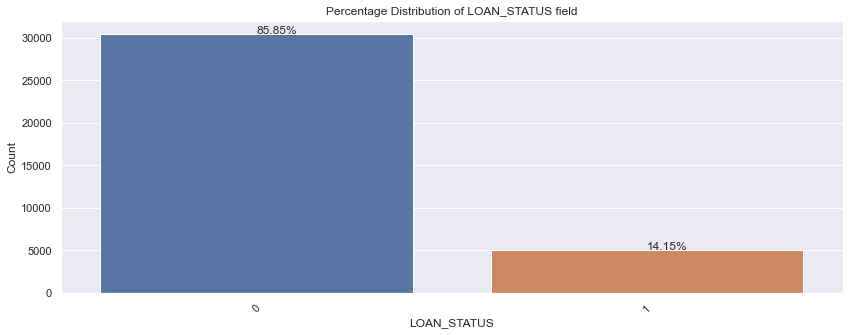

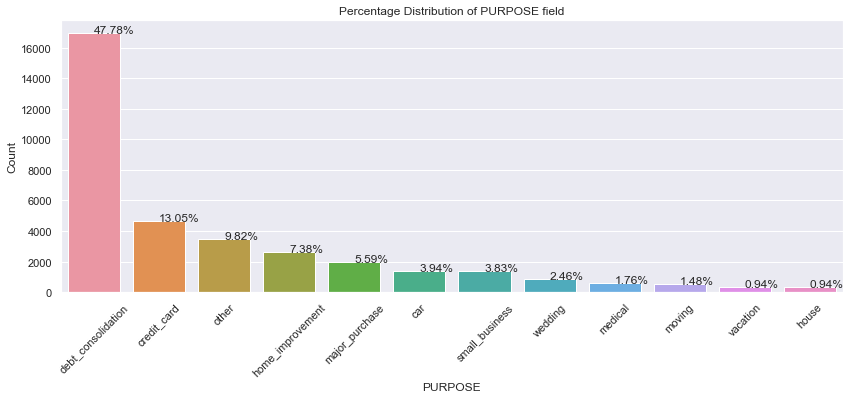

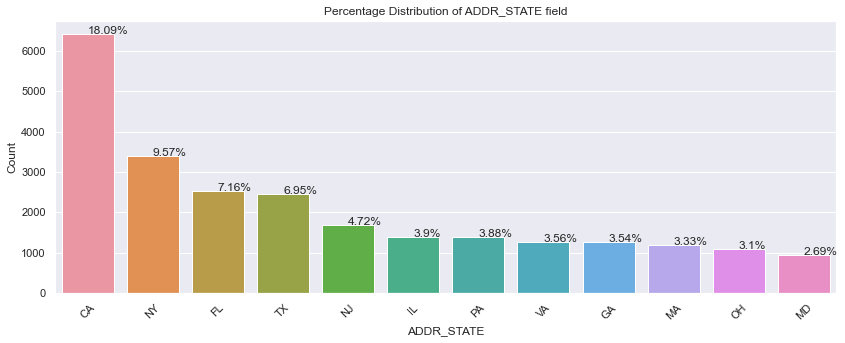

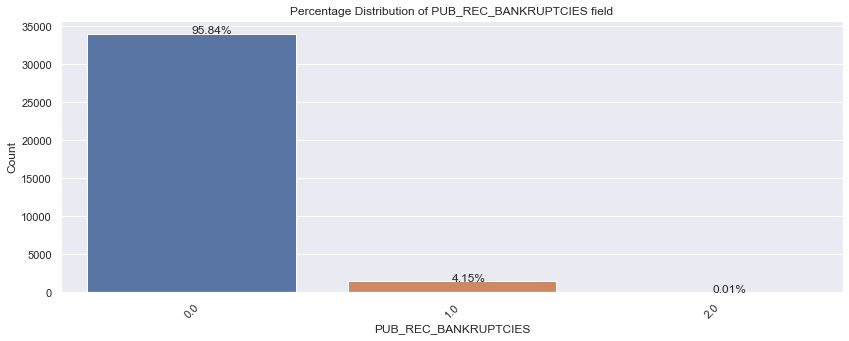

In [93]:
# count plots for categorical features
plot_categorical_features(categorical_features)

##### Observations:
1. **Grade B** has the *highest* count with **30.25%** loans falling under it. **Grade G** has the *lowest* count with only **0.81%** loans falling under it.



2. Sub_grades **'A4', 'B3', 'A5', 'B5' and 'B4'** are the top 5 sub_grades with a total **35.07%** loans falling under these categories.



3. A total of **92.63%** of customers have declared **'Rent' and 'Mortage'** as their home_ownership.



4. A majority of customers (**41.99%**) *donot* have their income verified. 



5. A total of **14.15%** of loans have *defaulted*.



6. A huge majority (**47.78%**) of the customers have declared their *'Purpose'* for loan application as **'debt_consolidation'**.



7. A huge majority (**95.84%**) of customers donot have any bankruptcies record.

In [94]:
categorical_features.remove('addr_state')
categorical_features.remove('loan_status')
categorical_features

['grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'pub_rec_bankruptcies']

###### Check count distribution for across different loan_status categories:

In [95]:
def univariate_target(cat_list):
    for cat in cat_list:
        plt.figure(figsize=(20,10))
        sns.set(style = 'darkgrid')
        plt1 = sns.countplot(data = loan_data, x = cat,hue='loan_status')
        plt.xticks(rotation = 45)
        plt.xlabel(cat.upper())
        plt.ylabel('Count')
        plt.title(cat.upper()+' -- Loan Status Distribution')
        if cat != 'sub_grade':
            for p in plt1.patches:
                plt1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')

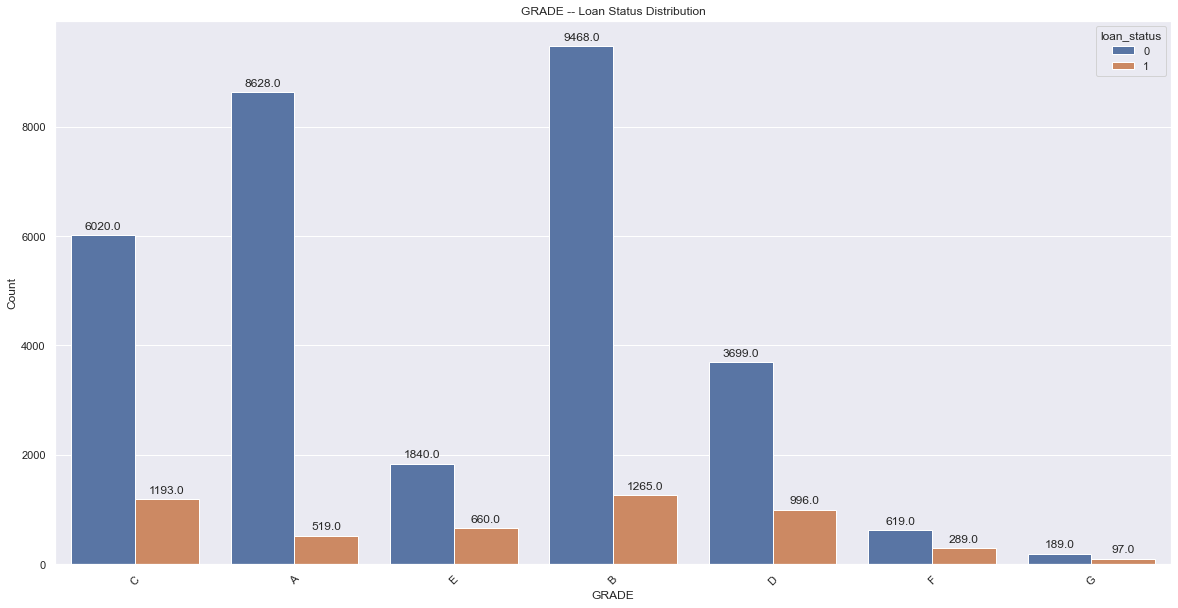

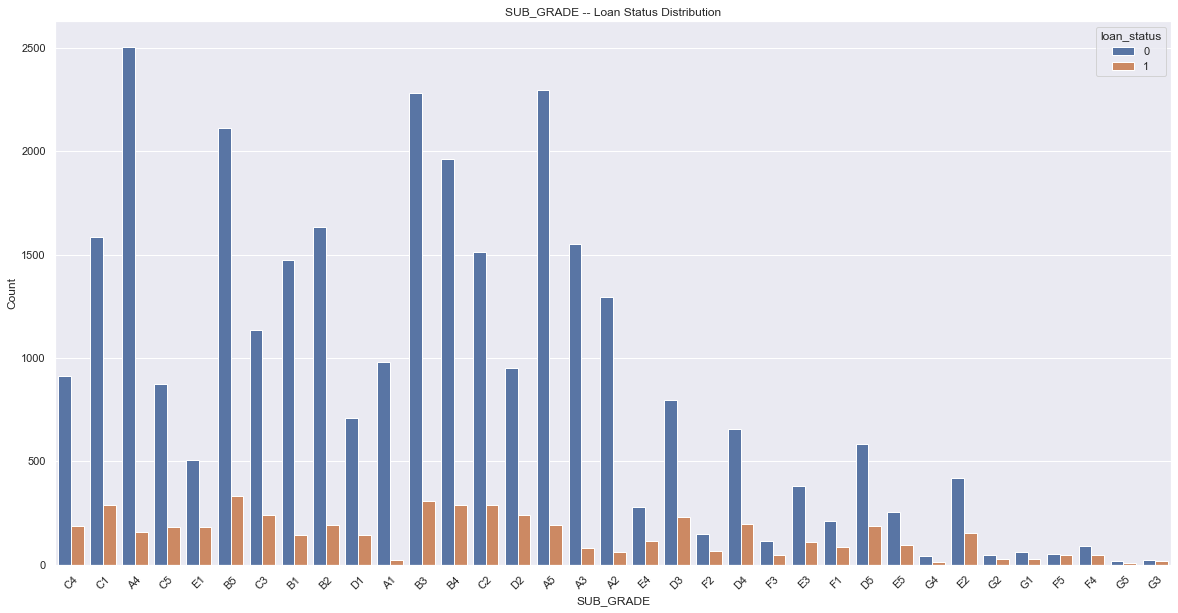

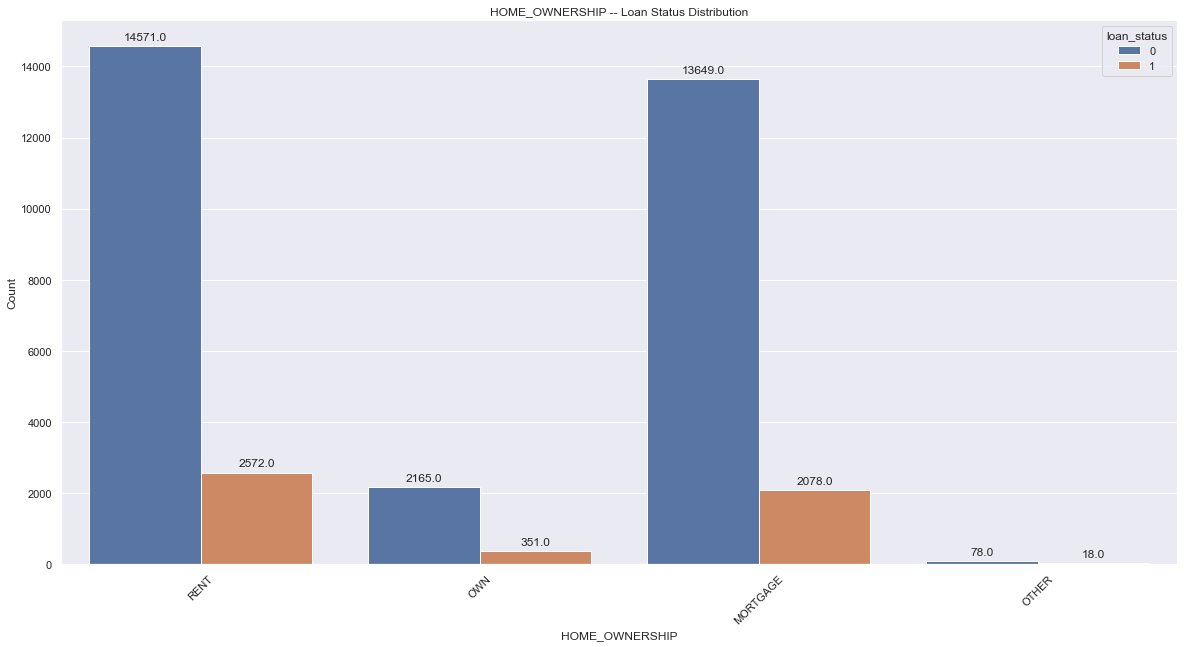

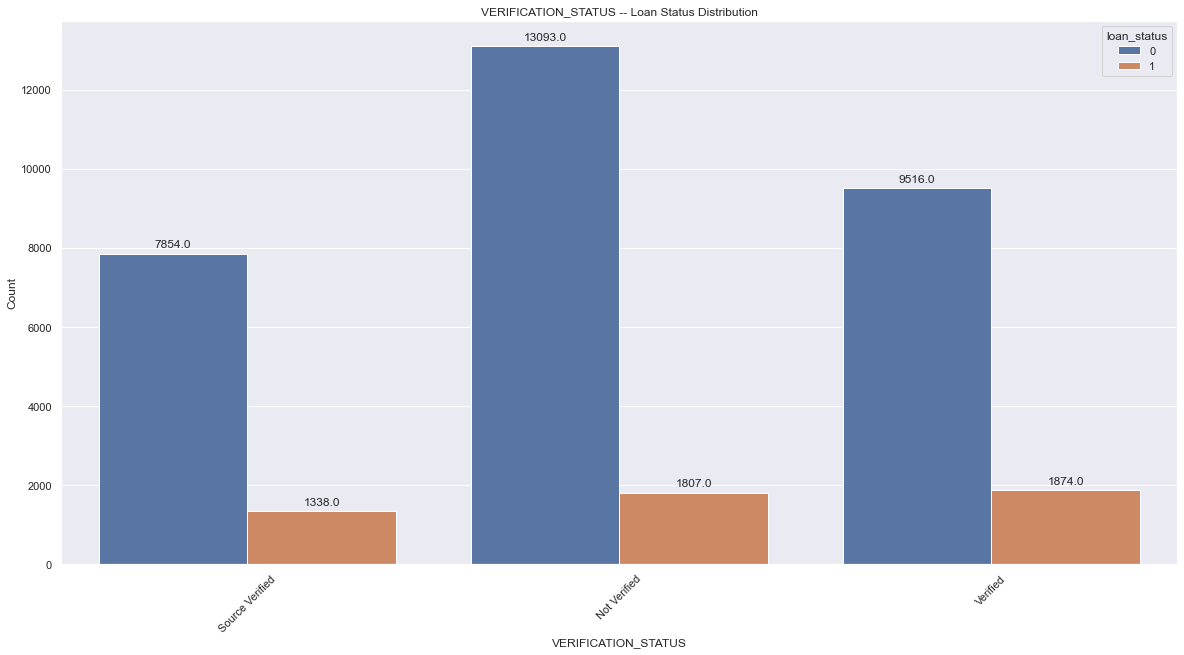

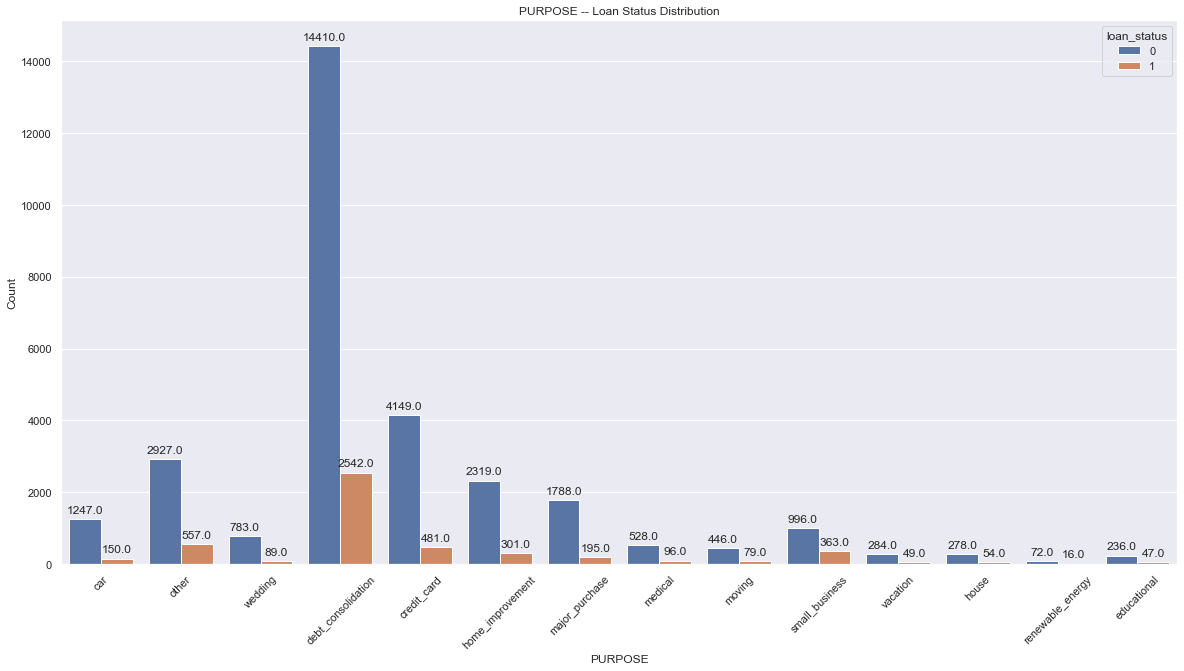

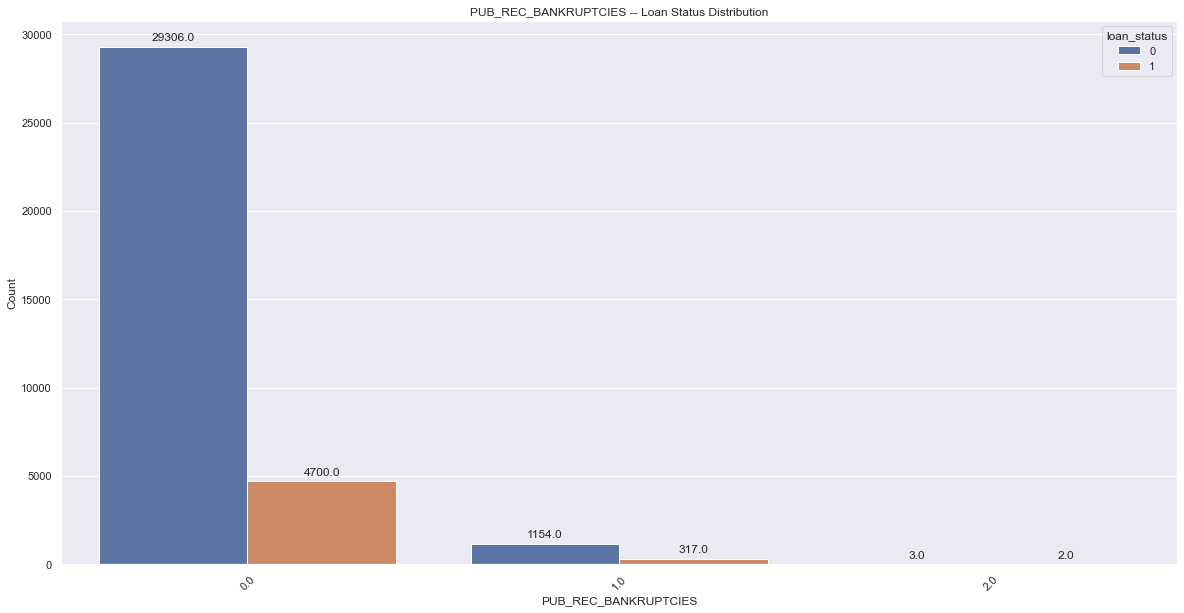

In [96]:
univariate_target(categorical_features)

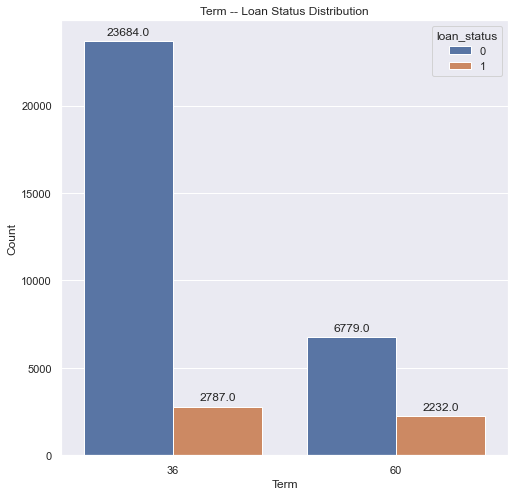

In [97]:
# plot the count fully paid and charged off based on term
plt.figure(figsize=(8,8))
sns.set(style = 'darkgrid')
plt1 = sns.countplot(data = loan_data, x = 'term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Term -- Loan Status Distribution')
for p in plt1.patches:
                plt1.annotate(format(p.get_height(), '.1f'),(p.get_x() + p.get_width() / 2., p.get_height()), 
                          ha = 'center', va = 'center', 
                          xytext = (0, 9), 
                          textcoords = 'offset points')
plt.show()

Since the total count of defaulted records are quite small as compared to non-defaults, the normalized plots will give a better understanding of the distribution of values across categories.

In [98]:
categories = ['grade','sub_grade','home_ownership','pub_rec_bankruptcies','purpose','term']
long_category = ['sub_grade']

###### Plot normalized frequency distribution of category columns against loan_status:

In [99]:

def category_loan_status_normalized(categories):
    for item in categories:
        plt.figure(figsize = (15,5))
        category_grp = loan_data.groupby(item).loan_status.value_counts(normalize = True).rename('normalized count').reset_index(drop = False)
        sns_graph = sns.barplot(x = item, y= 'normalized count', data = category_grp, hue = 'loan_status')
        plt.title('Normalized count distribution: {0} - loan_status'.format(item))
        if item == 'purpose':
            plt.xticks(rotation =45)       
        if item not in  long_category:
            for bar in sns_graph.patches:
                sns_graph.annotate(format(bar.get_height(),'.2f'),(bar.get_x()+bar.get_width()/2, bar.get_height()), ha = 'center', va ='center', xytext = (0,5), textcoords = 'offset points')

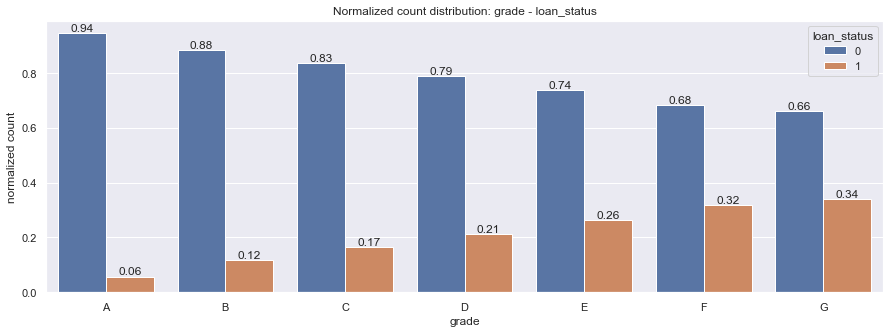

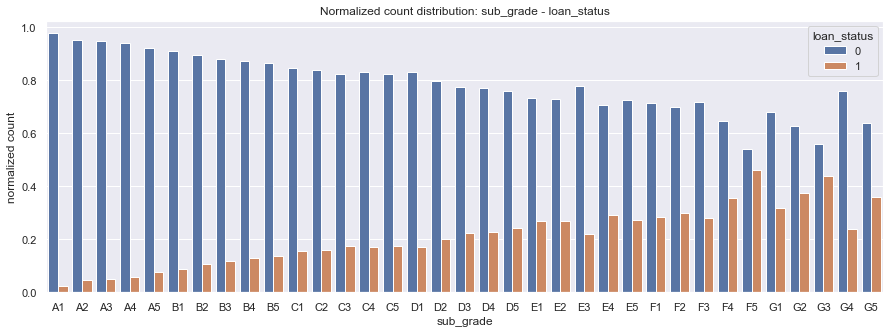

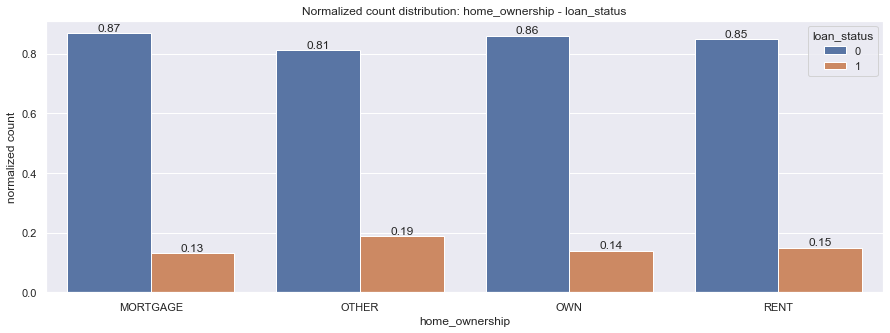

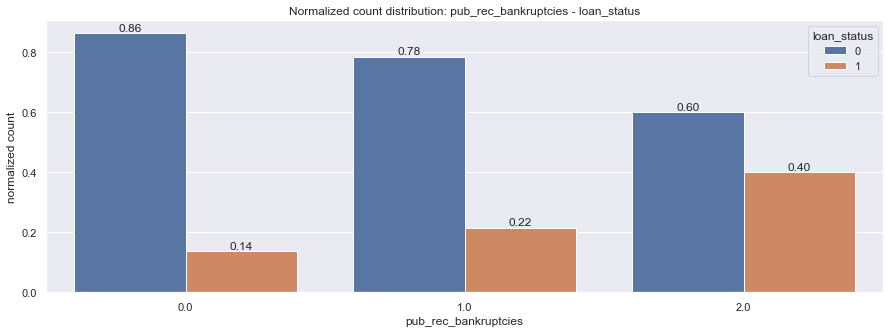

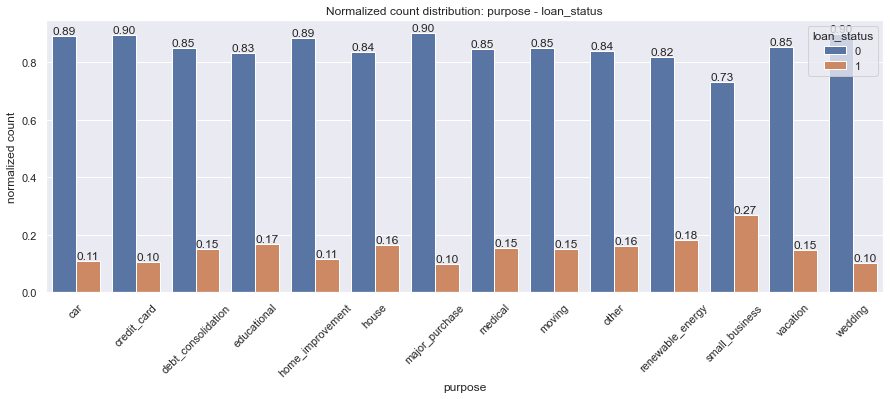

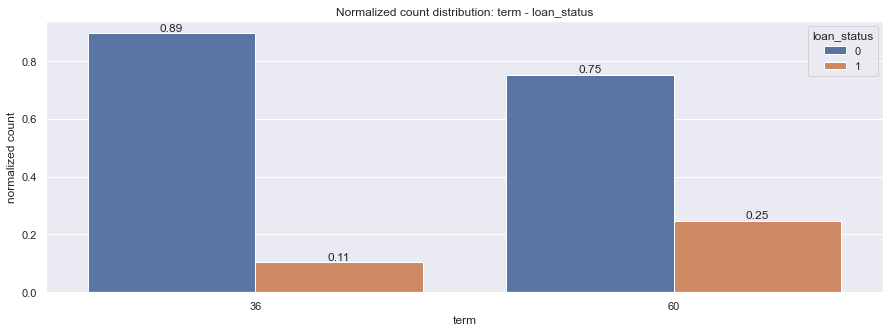

In [100]:
category_loan_status_normalized(categories)

###### Observations:

- For 'pub_rec_bankruptcies' we should not use 2.0 sub-category as we have only 5 records for it. So any analysis based on that will be very unstable. So ideally we should consider 1.0 sub-category.



- It is clear from the above graph that there is more chances of loan default as the applicant's grade goes down. Applicants falling in E,F and G categories are more likely to default in loan repayment. Also, charged_off cases show an inverse linear relationship with sub_grade. Those falling in lower sub_grades are more likely to default than those in higher sub_grade. 



- Employment, home_ownership and verification_status do not seem to affect the chances of charge off cases at this level of analysis.


- Applicants with previous records of bankruptcies are very likely to end up as charged-off cases.


- It is more probable that someone who have opted for '60 months' as term repayment duration to end up as charged-off case. 


- Loan applications with purposes as 'small_business' are slightly risky.


The last 2 points are not showing a strong behaviour. So they have to be studied further to identify any other underlying relations.

###### Check the 'issue_year' and 'issue_month' for any trend:

In [101]:
# Create a dataset with only records of charged_off loans
loan_chargedOff_df = loan_data[loan_data['loan_status'] == 1]
loan_chargedOff_df.shape

(5019, 16)

Plot charged off cases against month and year to identify any patterns present in it

In [102]:
loan_chargeOff_trend_df = loan_chargedOff_df.groupby(['issue_year','issue_month']).count()
loan_chargeOff_trend_df.reset_index(inplace=True)

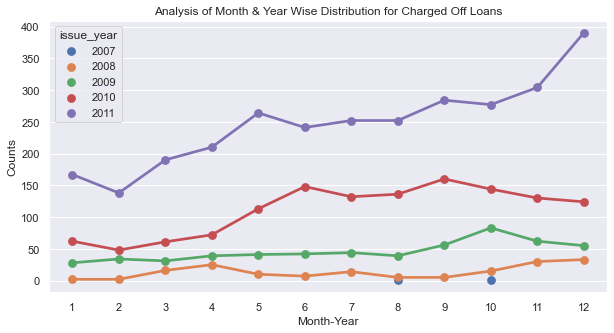

In [103]:
# plot the count of charged off records against month and year
plt.figure(figsize=(10,5))
sns.set(style = 'darkgrid')
sns.pointplot(data=loan_chargeOff_trend_df,x='issue_month',y='loan_status',hue='issue_year');
plt.title('Analysis of Month & Year Wise Distribution for Charged Off Loans');
plt.xlabel('Month-Year')
plt.ylabel('Counts')
plt.show()

###### Observations:

- We saw a major hike in count of defaulters for the month of 'May (05)' and 'Dec (12)' in the year 2011.

- For the year 2010, the hike was at 'June (06)'.

- For the year 2009, the hike was at 'Oct (10)'.


So we can conclude that there is no obvious trend in the month of defaults but May, June, Oct and Dec seems to be somewhat risky.

##### Checking the 'addr_state':

In [104]:
#check how many unique states are present in dataset
loan_data['addr_state'].value_counts().count()

49

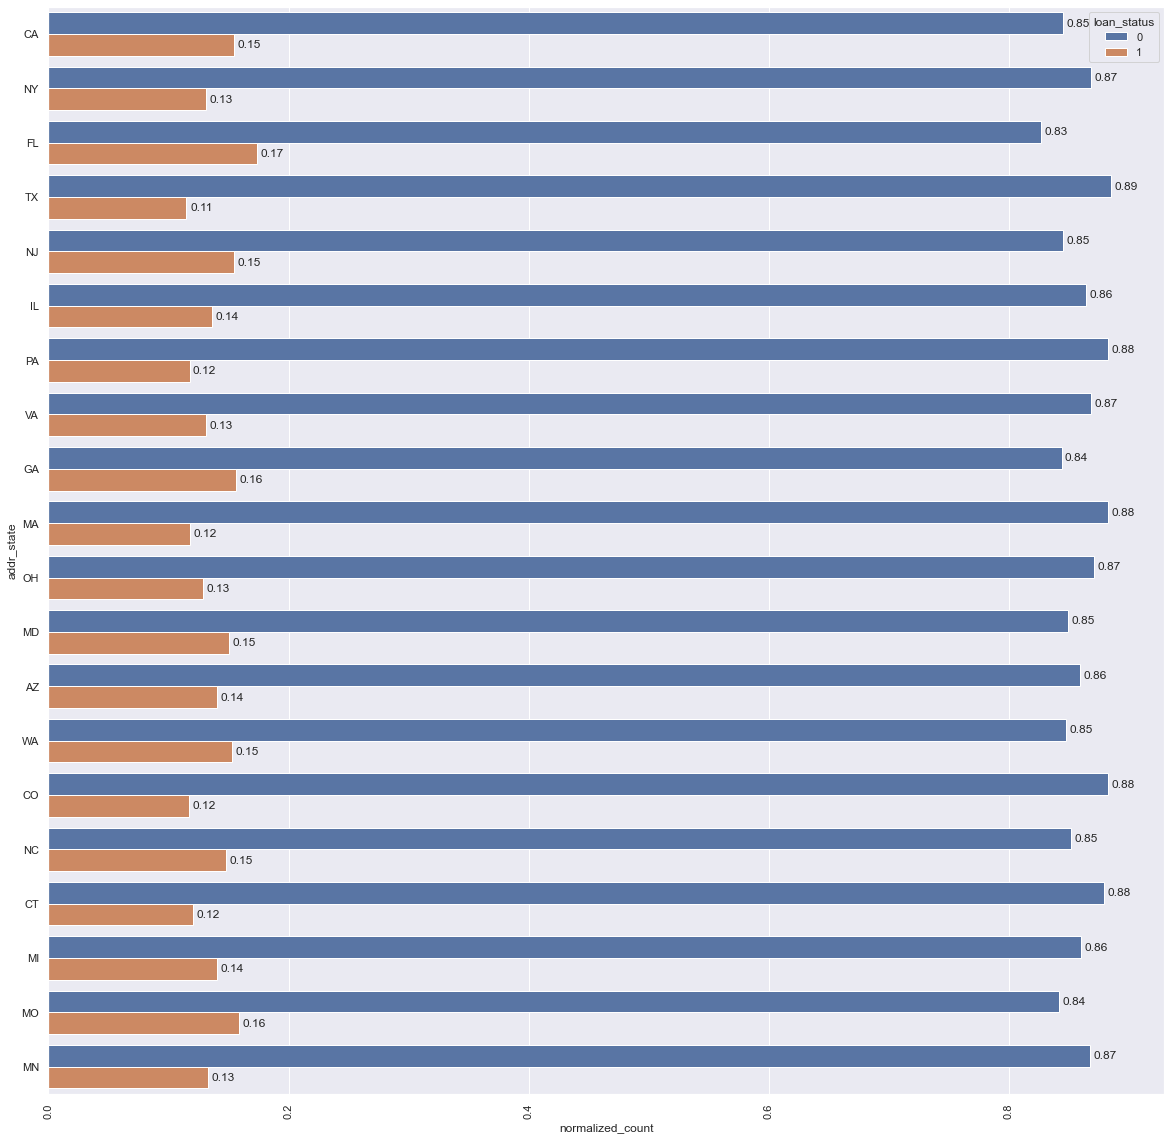

In [105]:
# check the normalized distribution of loan_status in the top 20 states
plt.figure(figsize=(20,20))
a = loan_data.groupby('addr_state').loan_status.value_counts(normalize = True).rename('normalized_count').reset_index()
sns_graph = sns.barplot(data= a, x = 'normalized_count', y = 'addr_state',hue='loan_status',order = loan_data['addr_state'].value_counts().head(20).index, orient = 'h' )
plt.xticks(rotation = 90)
for bar in sns_graph.patches:
    sns_graph.annotate(format(bar.get_width(),'.2f'),(bar.get_width(),bar.get_y()+bar.get_height()/2), ha = 'center', va ='center', xytext = (15,0), textcoords = 'offset points')

From this, we can conlude that charged_off cases are not varying much based on the address state.

- Check the Distribution of DTI with Loan Status:

In [106]:
loan_data.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,30463.0,13.276265,6.649042,0.0,8.150,13.34,18.52,29.99
1,5019.0,14.131176,6.529085,0.0,9.295,14.41,19.32,29.85


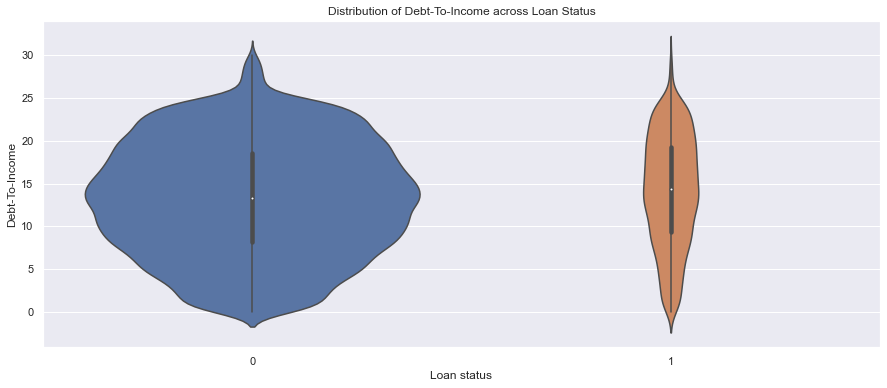

In [107]:
# check the distribution of dti w.r.t loan status
plt.figure(figsize=(15,6))
ax = sns.violinplot(x='loan_status', y='dti', data=loan_data, scale='count')
ax.set(xlabel = 'Loan status', ylabel = 'Debt-To-Income')
plt.title('Distribution of Debt-To-Income across Loan Status')
plt.show()

###### Observations:


- DTI has more wide spread for loan_status as 1.

###### Bivariate Analysis: Par1 :

Now let's check how quantitative variables are distributed w.r.t each other.

- Check how annual income varies from state to state

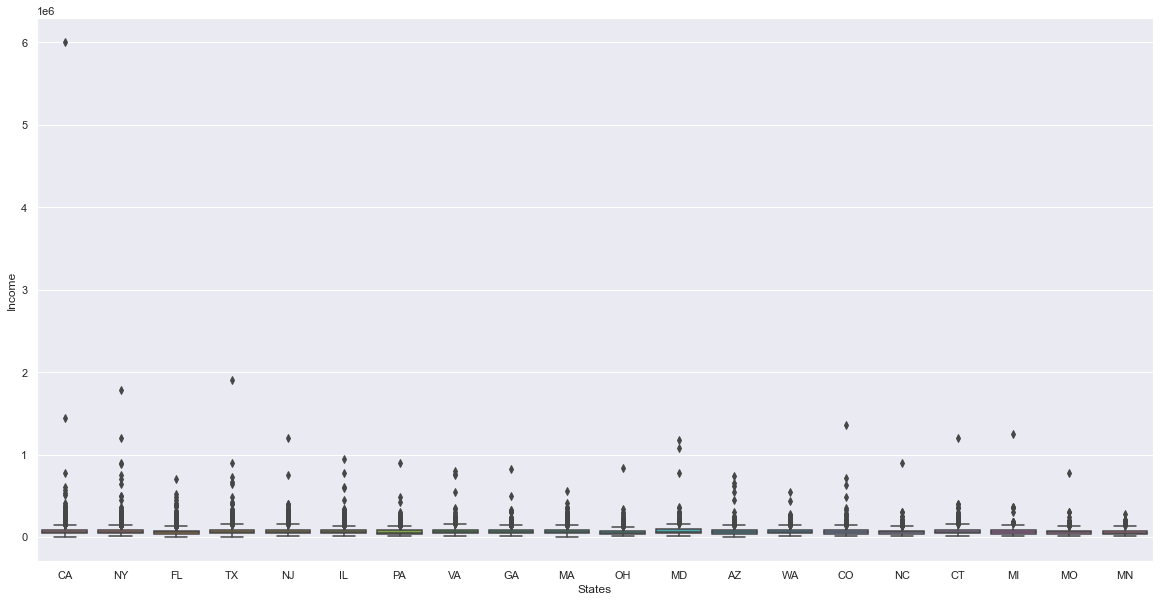

In [108]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='addr_state', y='annual_inc',data=loan_data,order = loan_data['addr_state'].value_counts().head(20).index);
ax.set(xlabel = 'States', ylabel = 'Income')
plt.show()

###### Observations:

- The state 'CA' has the highest value for outlier in the income variable.


- The state 'FL' has the lowest value for outlier and the highest percentage (17%) of defaulters (as seen above in the normalized plot). So, the state 'FL' seems to be somewhat risky.

- Check how dti varies from state to state:

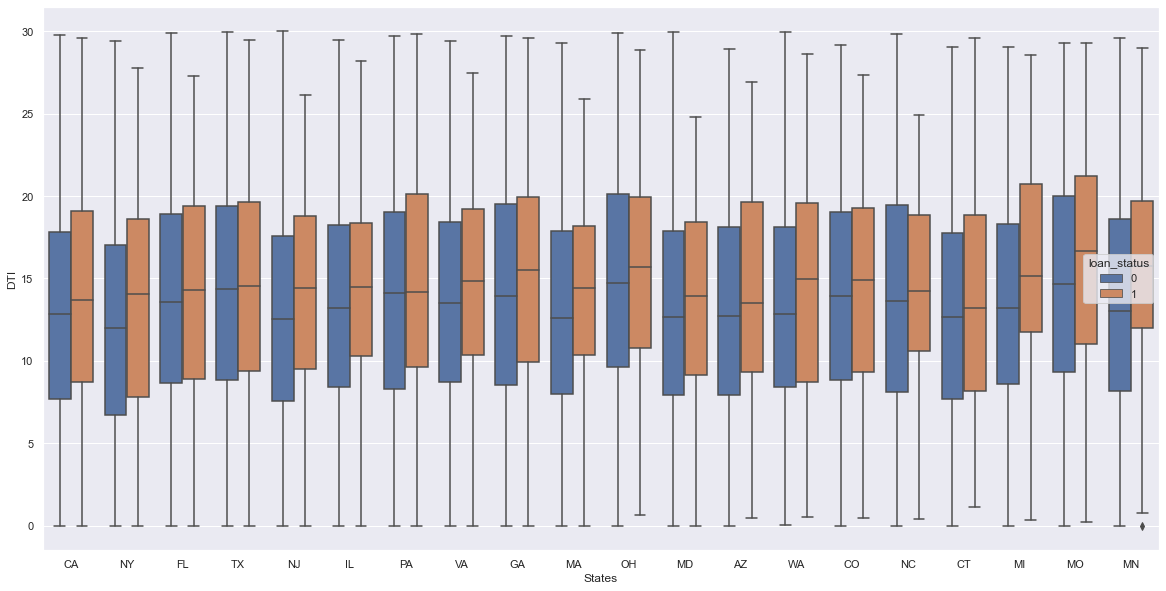

In [109]:
plt.figure(figsize=(20,10))
ax = sns.boxplot(x='addr_state', y='dti',data=loan_data,hue='loan_status',
                 order = loan_data['addr_state'].value_counts().head(20).index);
ax.set(xlabel = 'States', ylabel = 'DTI')
plt.show()

###### Observations:

- The distribution of DTI across states doesnt vary much. 

###### Derived Metrics: 

- Convert continuous variables into categorical for further analysis:

In [110]:
# perform q cut to generate bins of equal size
loan_data['loan_amnt-Bucket'] = pd.qcut(loan_data['loan_amnt'], q = 5, labels = ['VL','L','M','H','VH'])
loan_data['int_rate-Bucket'] = pd.qcut(loan_data['int_rate'],  q = 5, labels = ['VL','L','M','H','VH'])
loan_data['emp_length-Bucket'] = pd.qcut(loan_data['emp_length'],  q = 3, labels =['L','M','H'])
loan_data['annual_inc-Bucket'] = pd.qcut(loan_data['annual_inc'],  q = 5, labels = ['VL','L','M','H','VH'])
loan_data['dti-Bucket'] = pd.qcut(loan_data['dti'],  q = 4, labels = ['L','M','H','VH'])

In [111]:
loan_data['dti'].describe()

count    35482.000000
mean        13.397194
std          6.638803
min          0.000000
25%          8.310000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [112]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt-Bucket,int_rate-Bucket,emp_length-Bucket,annual_inc-Bucket,dti-Bucket
1,2500,60,15.27,C,C4,0.5,RENT,30000.0,Source Verified,1,...,GA,1.00,0.0,2011,12,VL,VH,L,VL,L
3,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,0,...,CA,20.00,0.0,2011,12,M,H,H,L,VH
5,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,0,...,AZ,11.20,0.0,2011,12,VL,VL,L,VL,M
6,7000,60,15.96,C,C5,8.0,RENT,47004.0,Not Verified,0,...,NC,23.51,0.0,2011,12,L,VH,H,L,VH
7,3000,36,18.64,E,E1,9.0,RENT,48000.0,Source Verified,0,...,CA,5.35,0.0,2011,12,VL,VH,H,L,L


In [113]:
categorical_features_binned = ['loan_amnt-Bucket','int_rate-Bucket','emp_length-Bucket','annual_inc-Bucket','dti-Bucket']

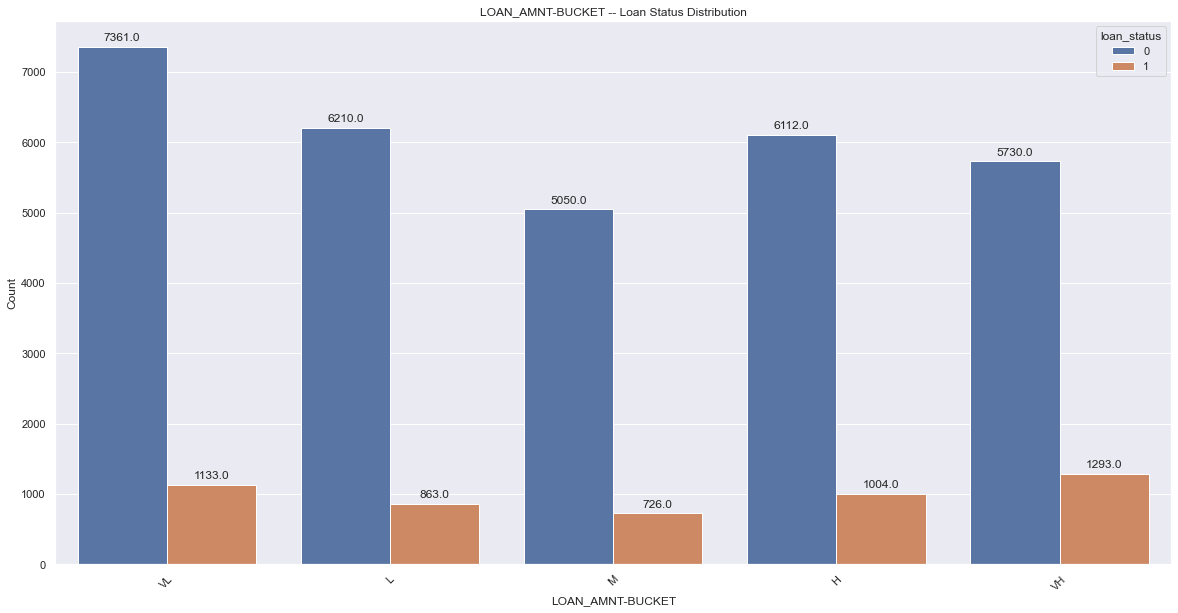

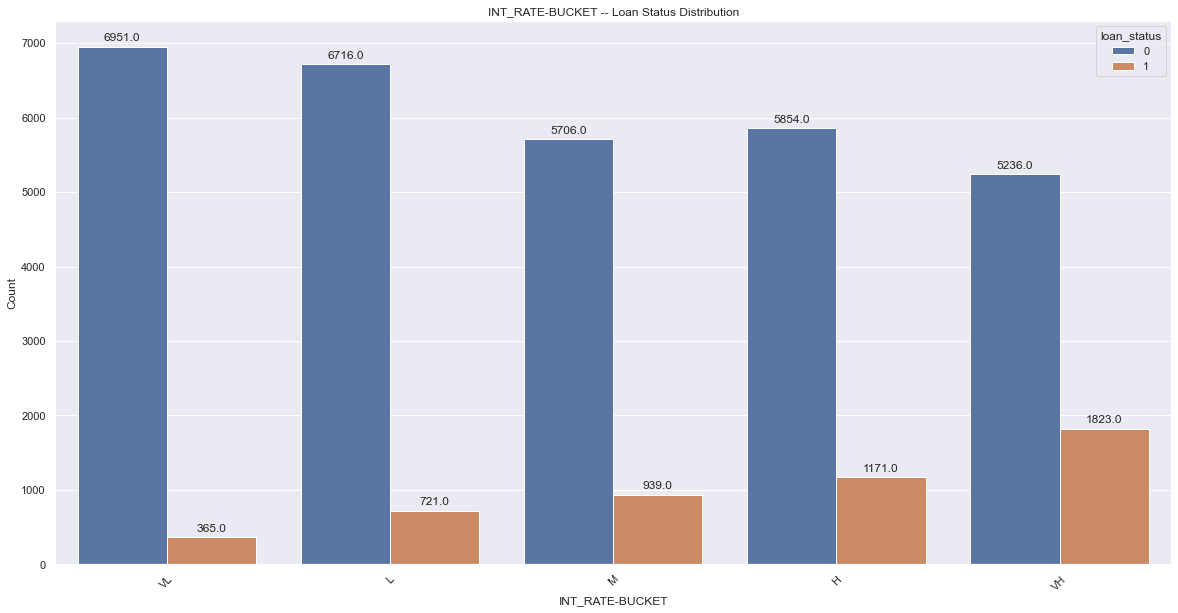

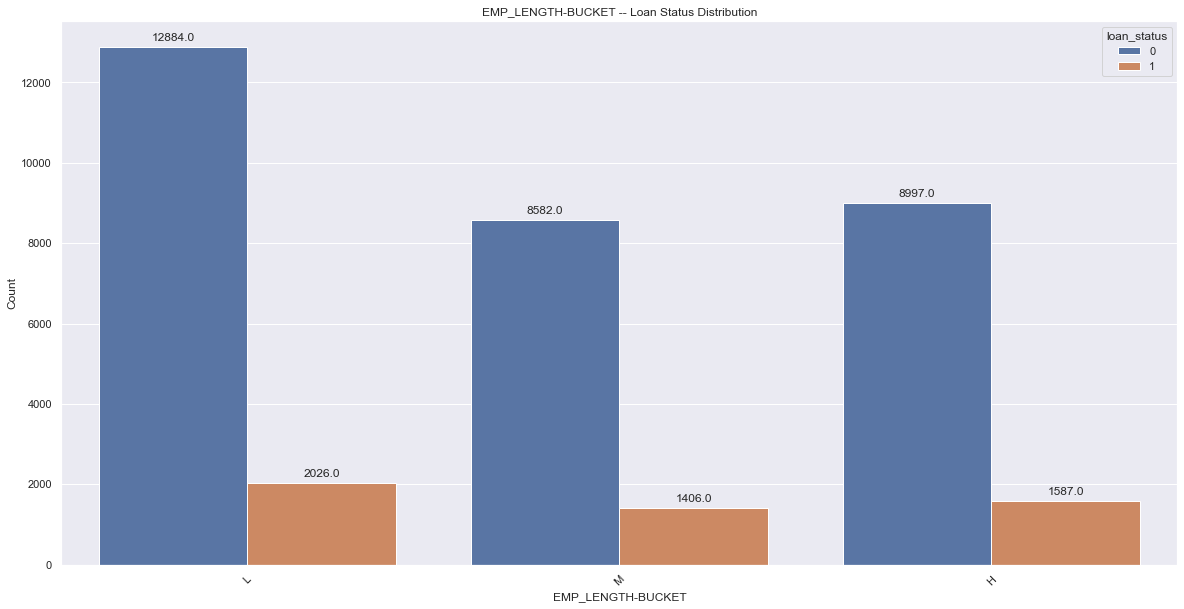

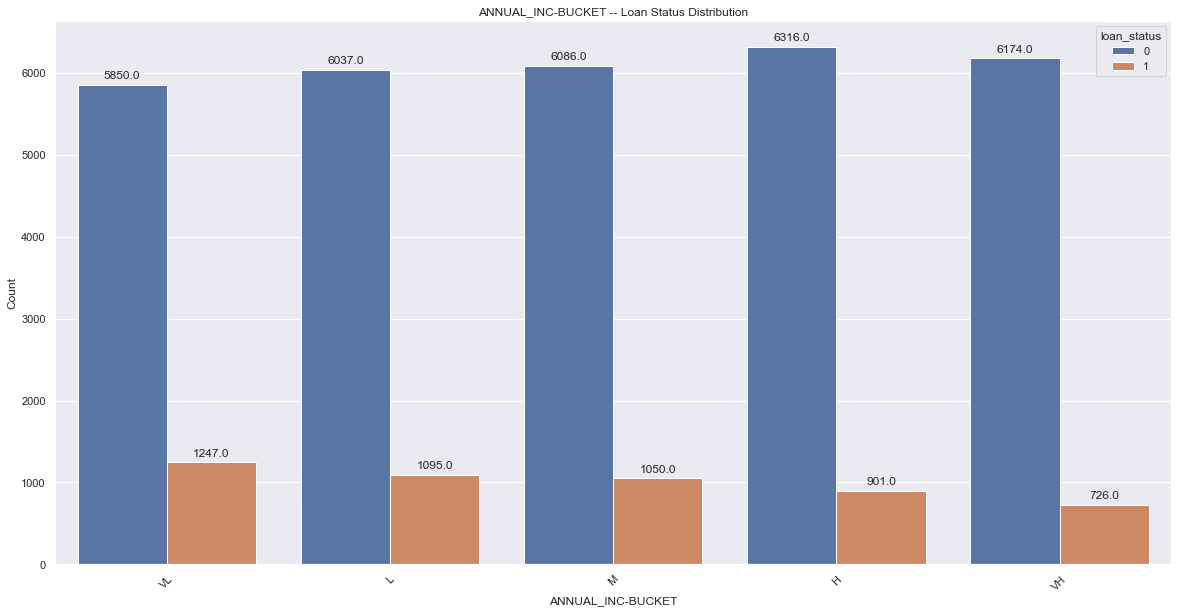

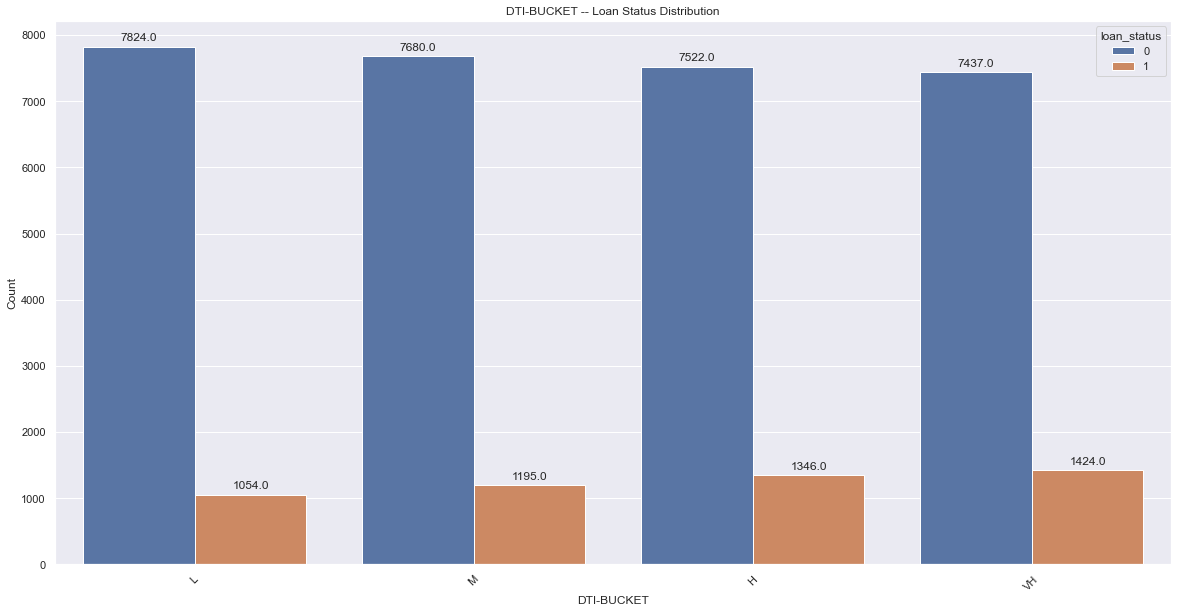

In [114]:
# analyse distribution of binned categories w.r.t loan status  
univariate_target(categorical_features_binned)

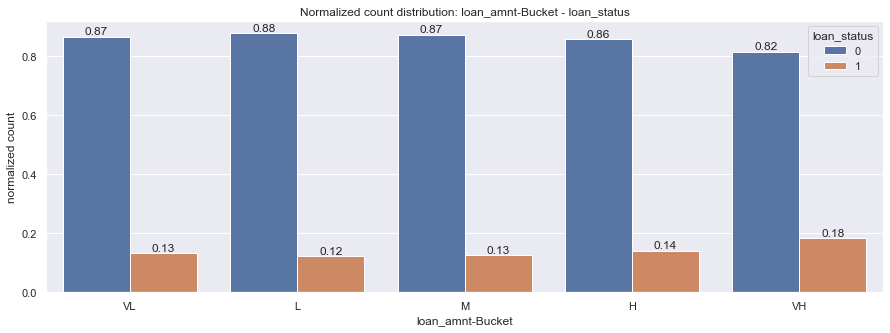

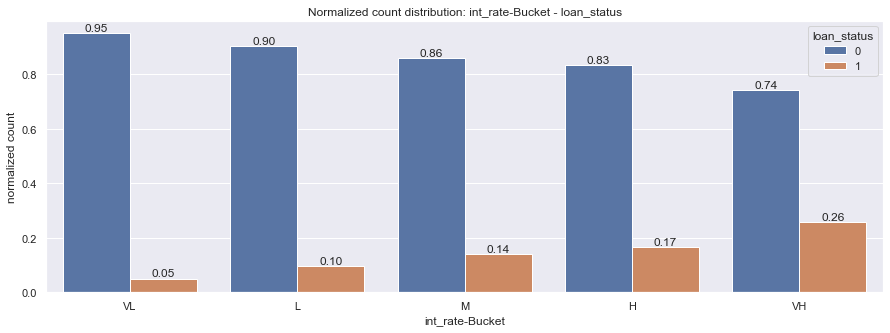

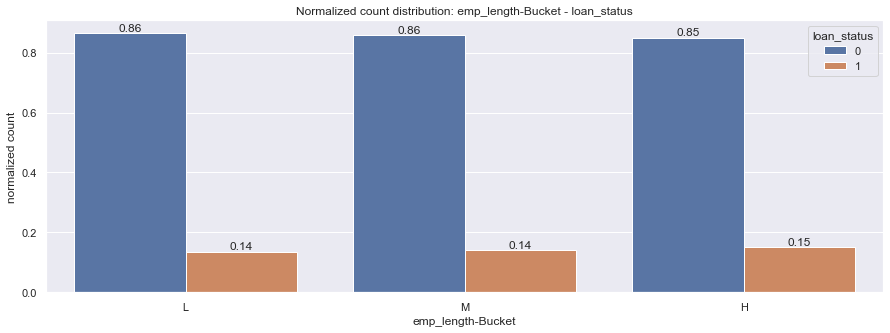

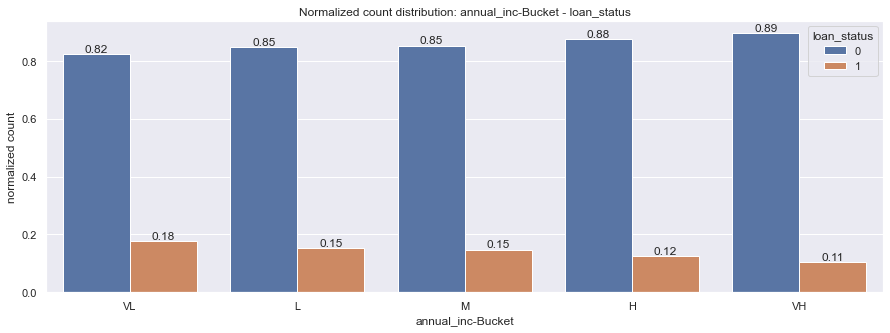

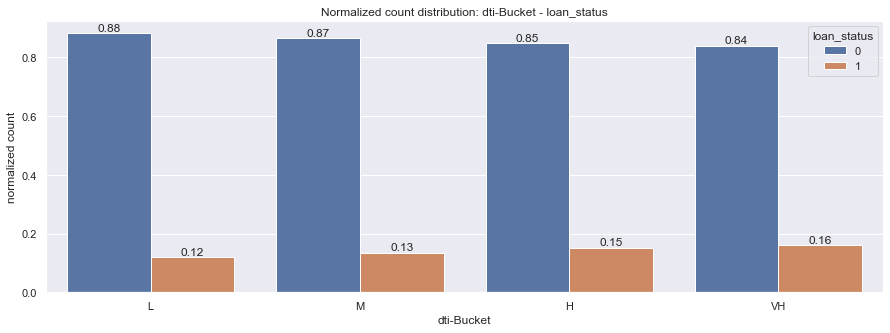

In [115]:
category_loan_status_normalized(categorical_features_binned)

##### Observations:


- Chances of charged-off cases **increases** as interest range goes from **very low to very high**.


- There is a slight increase in charged off cases when annual income decreases. This is evident before also from the correlation cluster map that showed that 'loan_status' and 'annual_inc' are negatively correlated. 



- There are slight increase in charged off cases when dti increases. But we can't say these variables alone are strong driving factors in LC losing money.



- There is a slight increase in charged off cases when loan amount increases.


###### Segmented Univariate Analysis:

##### Check the distribution of charged_off cases within various categorical variables

In [116]:
loan_data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_amnt-Bucket,int_rate-Bucket,emp_length-Bucket,annual_inc-Bucket,dti-Bucket
1,2500,60,15.27,C,C4,0.5,RENT,30000.0,Source Verified,1,...,GA,1.00,0.0,2011,12,VL,VH,L,VL,L
3,10000,36,13.49,C,C1,10.0,RENT,49200.0,Source Verified,0,...,CA,20.00,0.0,2011,12,M,H,H,L,VH
5,5000,36,7.90,A,A4,3.0,RENT,36000.0,Source Verified,0,...,AZ,11.20,0.0,2011,12,VL,VL,L,VL,M
6,7000,60,15.96,C,C5,8.0,RENT,47004.0,Not Verified,0,...,NC,23.51,0.0,2011,12,L,VH,H,L,VH
7,3000,36,18.64,E,E1,9.0,RENT,48000.0,Source Verified,0,...,CA,5.35,0.0,2011,12,VL,VH,H,L,L


- Create a pivot table with number of charged_off cases w.r.t purpose and term

In [117]:
loan_term_purpose_group = pd.pivot_table(data= loan_data, values='loan_status', index='purpose', columns='term', aggfunc='sum')
loan_term_purpose_group

term,36,60
purpose,,
car,74,76
credit_card,272,209
debt_consolidation,1306,1236
educational,41,6
home_improvement,172,129
house,24,30
major_purchase,114,81
medical,63,33
moving,61,18


<Figure size 1440x1440 with 0 Axes>

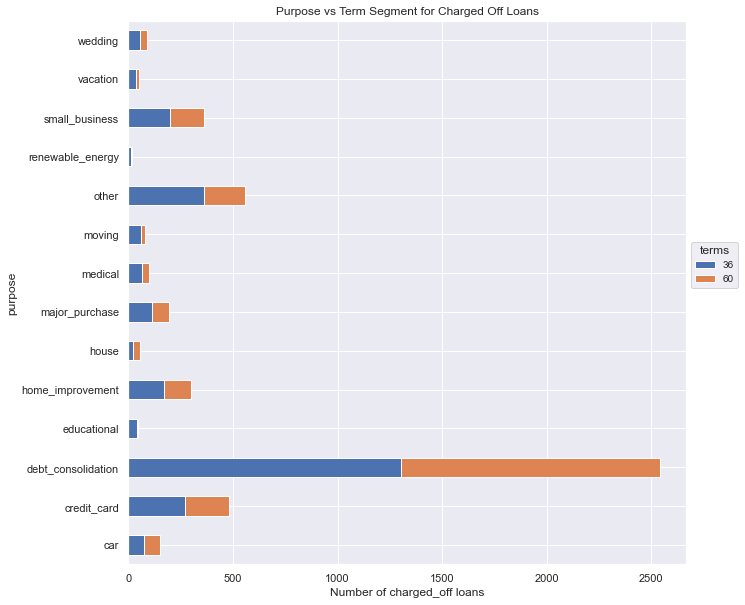

In [118]:
plt.figure(figsize=(20,20))
plt1 = loan_term_purpose_group.plot(kind = 'barh', stacked=True,figsize=(10, 10))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, loc='lower center', bbox_to_anchor=(1.05,0.5),title = 'terms')
plt.xlabel('Number of charged_off loans')
plt.title('Purpose vs Term Segment for Charged Off Loans')
plt.show()

##### Observations:

- Majority of charged_off loans are taken for debt consolidation. The count across 36 and 60 months term for this segment is nearly same.


- Purpose as 'other' and term as 36 months are again an important segment for charged off loans.


- For purpose 'small business' and 'credit card', the count of charged off loans for 36 and 60 months are again nearly same.

- Create a pivot table with number of charged_off cases w.r.t purpose and home_ownership:

In [119]:
loan_home_ownership_purpose_group = pd.pivot_table(data= loan_data, values='loan_status', index='purpose', columns='home_ownership', aggfunc='sum')
loan_home_ownership_purpose_group 

home_ownership,MORTGAGE,OTHER,OWN,RENT
purpose,,,,
car,61.0,1.0,14.0,74.0
credit_card,211.0,2.0,28.0,240.0
debt_consolidation,1070.0,7.0,164.0,1301.0
educational,11.0,0.0,2.0,34.0
home_improvement,237.0,1.0,30.0,33.0
house,17.0,0.0,3.0,34.0
major_purchase,61.0,0.0,21.0,113.0
medical,37.0,0.0,9.0,50.0
moving,7.0,1.0,5.0,66.0


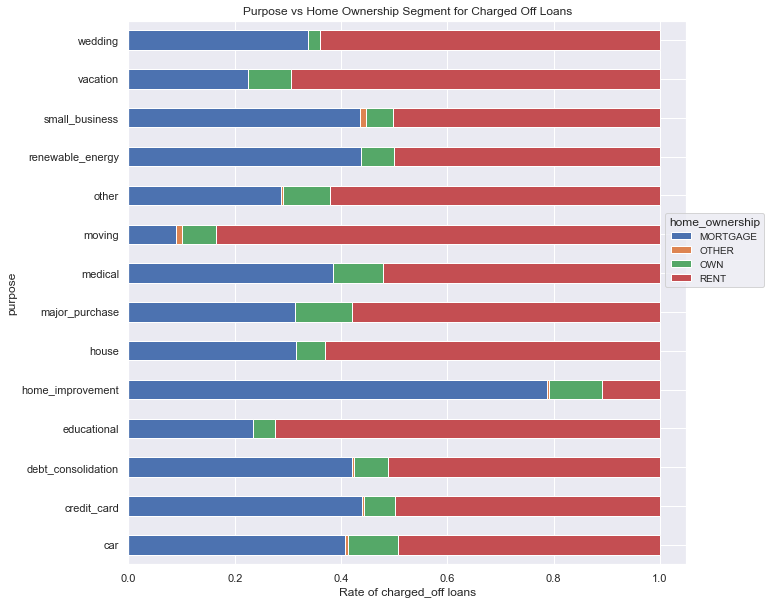

In [120]:
df = loan_home_ownership_purpose_group[['MORTGAGE','OTHER','OWN','RENT']].apply(lambda x:x/x.sum(), axis = 1)
plt1 = df.plot(kind = 'barh', stacked=True,figsize=(10, 10))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, loc='lower center', bbox_to_anchor=(1.05,0.5), title = 'home_ownership')
plt.xlabel('Rate of charged_off loans')
plt.title('Purpose vs Home Ownership Segment for Charged Off Loans')
plt.show()

##### Observations:

- Segmemts for purpose **'home_improvement'** and home_ownership as **'MORTAGE'** are pretty significant for charged off loans. 


- Purpose as **'educational'** and home_ownership as **'RENT'** are again an important segment for charged off loans.

- Create a pivot table with number of charged_off cases w.r.t int_rate-Bucket and pub_rec_bankruptcies:

In [121]:
loan_bankruptcyRec_intRate_group = pd.pivot_table(data= loan_data, values='loan_status', index='int_rate-Bucket', columns='pub_rec_bankruptcies', aggfunc='sum')
loan_bankruptcyRec_intRate_group

pub_rec_bankruptcies,0.0,1.0,2.0
int_rate-Bucket,,,
VL,361.0,4.0,NaN
L,684.0,36.0,1.0
M,898.0,41.0,NaN
H,1083.0,88.0,0.0
VH,1674.0,148.0,1.0


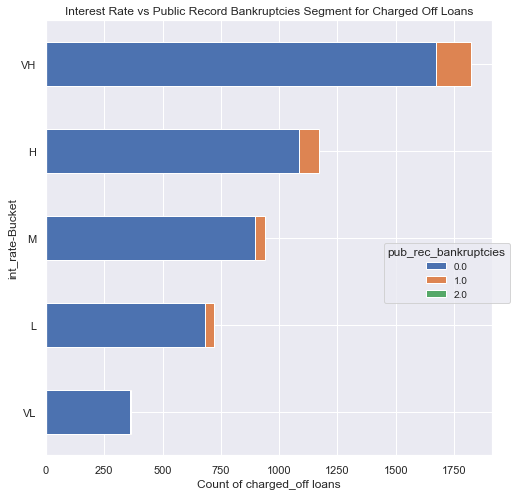

In [122]:
plt1 = loan_bankruptcyRec_intRate_group.plot(kind = 'barh', stacked=True,figsize=(8, 8))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, bbox_to_anchor=(1.05,0.5), title = 'pub_rec_bankruptcies')
plt.title('Interest Rate vs Public Record Bankruptcies Segment for Charged Off Loans')
plt.xlabel('Count of charged_off loans')
plt.show()

##### Observations:

- Maximum chargeoff case happens for **Very High** and **High** Interest Rate and Bankruptcies record as 1.

- Create a pivot table with number of charged_off cases w.r.t emp_length-Bucket and 'dti-Bucket':

In [123]:
loan_dti_empLength_group = pd.pivot_table(data= loan_data, values='loan_status', index='emp_length-Bucket', columns='dti-Bucket', aggfunc='sum')
loan_dti_empLength_group

dti-Bucket,L,M,H,VH
emp_length-Bucket,,,,
L,459,497,532,538
M,300,321,382,403
H,295,377,432,483


In [124]:
stat, p, dof, expected = chi2_contingency(loan_dti_empLength_group)
print('stat=%.3f, p=%.5f' % (stat, p))
print('dof=%d' % dof)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=13.303, p=0.03847
dof=6
Probably dependent


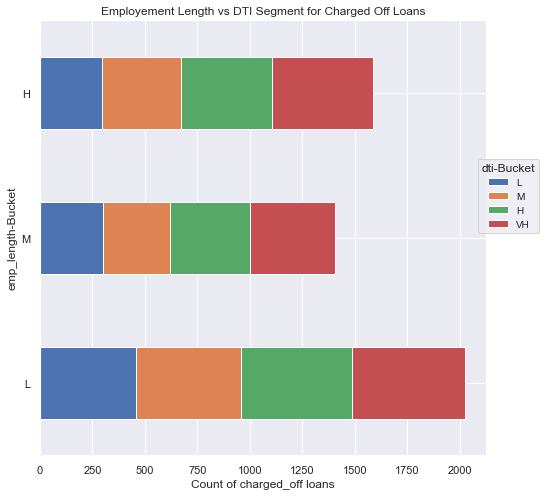

In [125]:
plt1 = loan_dti_empLength_group.plot(kind = 'barh', stacked=True,figsize=(8, 8))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, loc='lower center', bbox_to_anchor=(1.05,0.5), title = 'dti-Bucket')
plt.title('Employement Length vs DTI Segment for Charged Off Loans')
plt.xlabel('Count of charged_off loans')
plt.show()

###### Observation:


- As employee length increases there is a decrease in charged off cases. 



- The count of DTI levels of 'High' and 'Very High', remains same across all buckets of employee length. This means every bucket of employee length has equal chance of having high DTI values.

- Create a pivot table with number of charged_off cases w.r.t loan_amnt-Bucket and 'dti-Bucket':

In [126]:
loan_dti_loanAmnt_group = pd.pivot_table(data= loan_data, values='loan_status', index='loan_amnt-Bucket', columns='dti-Bucket', aggfunc='sum')
loan_dti_loanAmnt_group

dti-Bucket,L,M,H,VH
loan_amnt-Bucket,,,,
VL,304,248,288,293
L,199,207,219,238
M,153,169,186,218
H,186,265,262,291
VH,212,306,391,384


<Figure size 1440x1440 with 0 Axes>

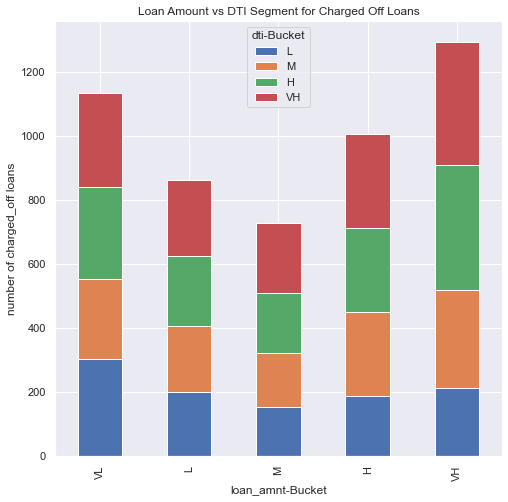

In [127]:
df = loan_dti_loanAmnt_group[['L','M','H','VH']]
plt.figure(figsize=(20,20))
loan_dti_loanAmnt_group.plot(kind = 'bar', stacked=True,figsize=(8, 8))
plt.ylabel('number of charged_off loans')
plt.title('Loan Amount vs DTI Segment for Charged Off Loans')
plt.show()

###### Observations:

- As loan amount increases, the charge off cases also increases slightly for dti buckets as 'High' and 'Very High'.


- As loan amount increases from 'Low' to 'Medium', dti and charged offs decreases.

- Create a pivot table with number of charged_off cases w.r.t 'dti-Bucket'and 'income-bucket'

In [128]:
income_dti = pd.pivot_table(data= loan_data, values='loan_status', index='annual_inc-Bucket', columns='dti-Bucket', aggfunc='sum')
income_dti

dti-Bucket,L,M,H,VH
annual_inc-Bucket,,,,
VL,297,274,299,377
L,213,249,297,336
M,198,237,292,323
H,161,244,250,246
VH,185,191,208,142


In [129]:
stat, p, dof, expected = chi2_contingency(income_dti)
print('stat=%.3f, p=%.5f' % (stat, p))
print('dof=%d' % dof)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=59.642, p=0.00000
dof=12
Probably dependent


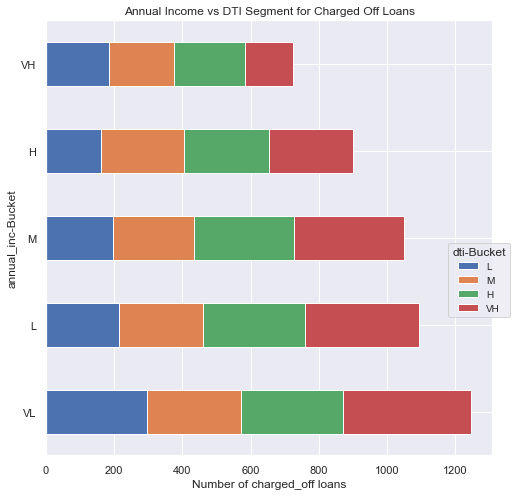

In [130]:
plt1 = income_dti.plot(kind = 'barh', stacked=True,figsize=(8, 8))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, bbox_to_anchor=(1.05,0.5), title = 'dti-Bucket')
plt.xlabel('Number of charged_off loans')
plt.title('Annual Income vs DTI Segment for Charged Off Loans')
plt.show()

###### Observations:

- As annual income increases, less number of loans are charged off. 


- Also dti reduces with increase in income

- Create a pivot table with number of charged_off cases w.r.t 'verification_status'and 'annual_inc-Bucket'

In [131]:
income_verification = pd.pivot_table(data= loan_data, values='loan_status', index='verification_status', columns='annual_inc-Bucket', aggfunc='sum')
income_verification

annual_inc-Bucket,VL,L,M,H,VH
verification_status,,,,,
Not Verified,568,453,370,261,155
Source Verified,392,303,262,211,170
Verified,287,339,418,429,401


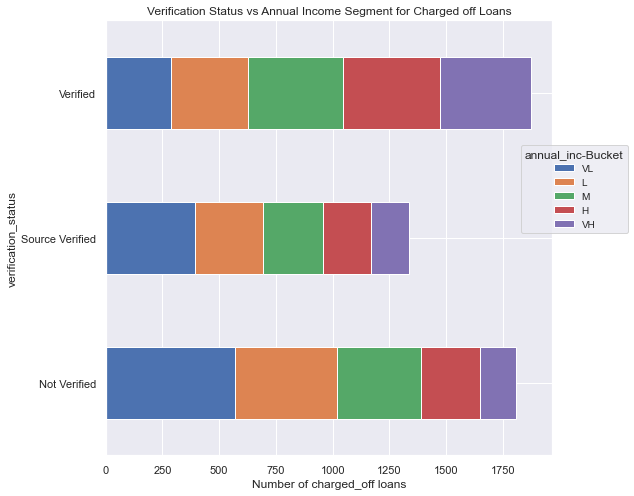

In [132]:
plt1 = income_verification.plot(kind = 'barh', stacked=True,figsize=(8, 8))
handles, labels = plt1.get_legend_handles_labels()
plt.legend(handles, labels,fontsize=10, loc='lower center', bbox_to_anchor=(1.05,0.5), title = 'annual_inc-Bucket')
plt.title('Verification Status vs Annual Income Segment for Charged off Loans')
plt.xlabel('Number of charged_off loans')
plt.show()

###### Observations:

- We get majority of the charged off loans for verification status as Verified. 


- Also count of charged off loans is maximum for the segment verification status as **verified** and annual_income as **'High' and 'Very High'**.

##### Bivariate Analysis: Part 2:

In [133]:
charged_off = loan_data[loan_data.loan_status == 1]
charged_off.columns

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'addr_state', 'dti', 'pub_rec_bankruptcies', 'issue_year',
       'issue_month', 'loan_amnt-Bucket', 'int_rate-Bucket',
       'emp_length-Bucket', 'annual_inc-Bucket', 'dti-Bucket'],
      dtype='object')

###### Check how charged-off cases are distributed:

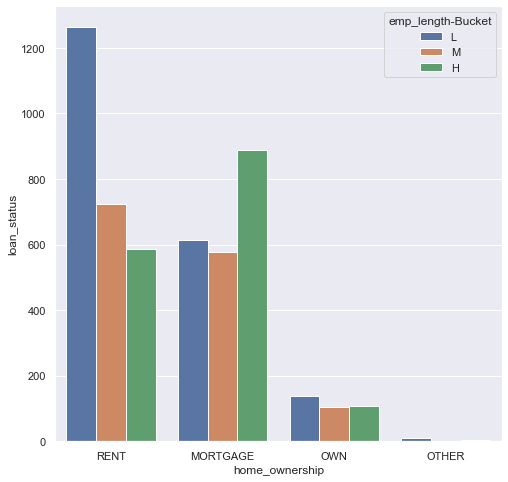

In [134]:
plt.figure(figsize=(8, 8))
sns.barplot(data = charged_off, x = 'home_ownership', y = 'loan_status' , hue = 'emp_length-Bucket', estimator = np.sum)
plt.show()

###### Observation: 

- People who are paying rent and have low employment duration are very likely to default.


- People who have Mortgage and High Employement duration are also very likely to default.

###### Check what is causing applicants with higher employment duration to become defaulters, when they have mortgage to pay off.:

<Figure size 720x720 with 0 Axes>

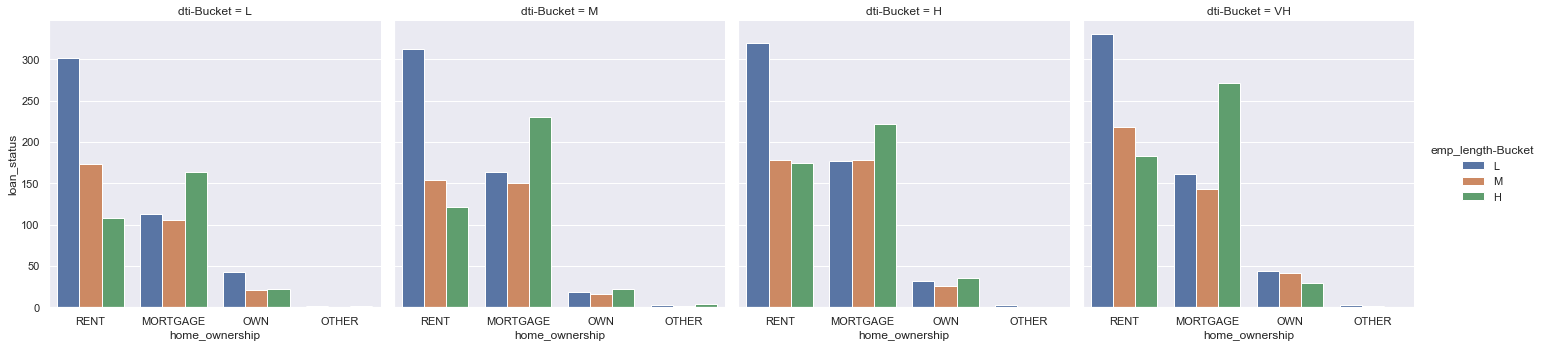

In [135]:
plt.figure(figsize=(10,10))
sns.catplot(data = charged_off, x = 'home_ownership', y = 'loan_status' , hue = 'emp_length-Bucket', col = 'dti-Bucket', kind = 'bar', estimator = np.sum )
plt.show()

###### Observations:


- Number of charged_off cases remain almost the same for emplyment duration 'High' and MORTGAGE bucket even when dti is increasing from Low to Very High.

###### Check what is causing applicants with higher employment duartion to become defaulters, when they have mortgage to pay off.
###### Checking with loan amount as 1 of the parameter

<Figure size 720x720 with 0 Axes>

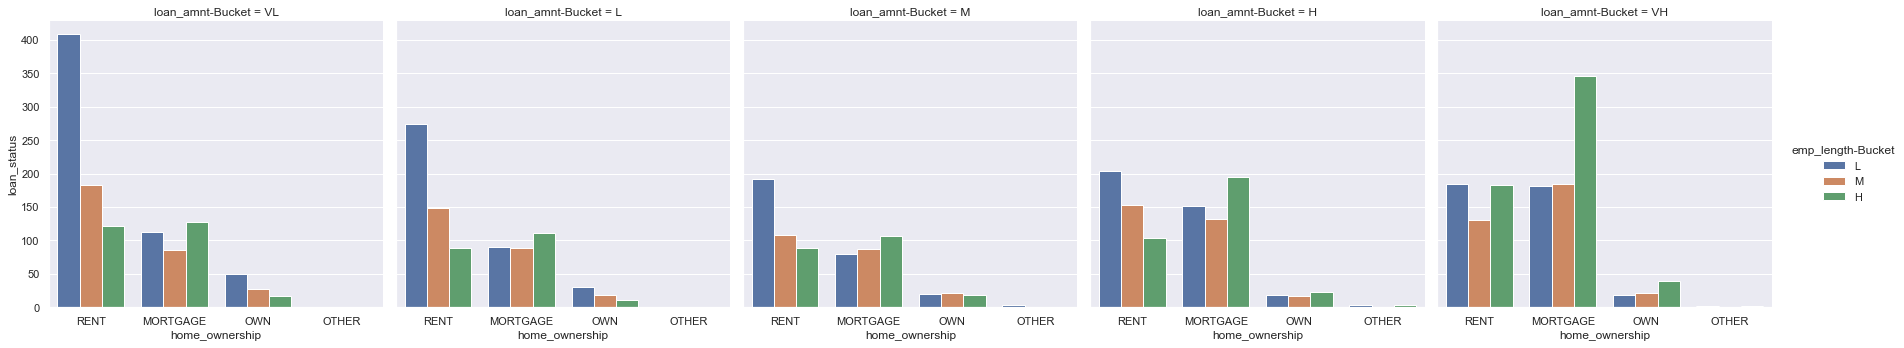

In [136]:
plt.figure(figsize=(10,10))
sns.catplot(data = charged_off, x = 'home_ownership', y = 'loan_status' , hue = 'emp_length-Bucket', col = 'loan_amnt-Bucket', kind = 'bar', estimator = np.sum )
plt.show()

Looking at the plots above, we can conclude that applicants with high exeprience while paying off mortgage took huge amount of loan resulting in loan default.

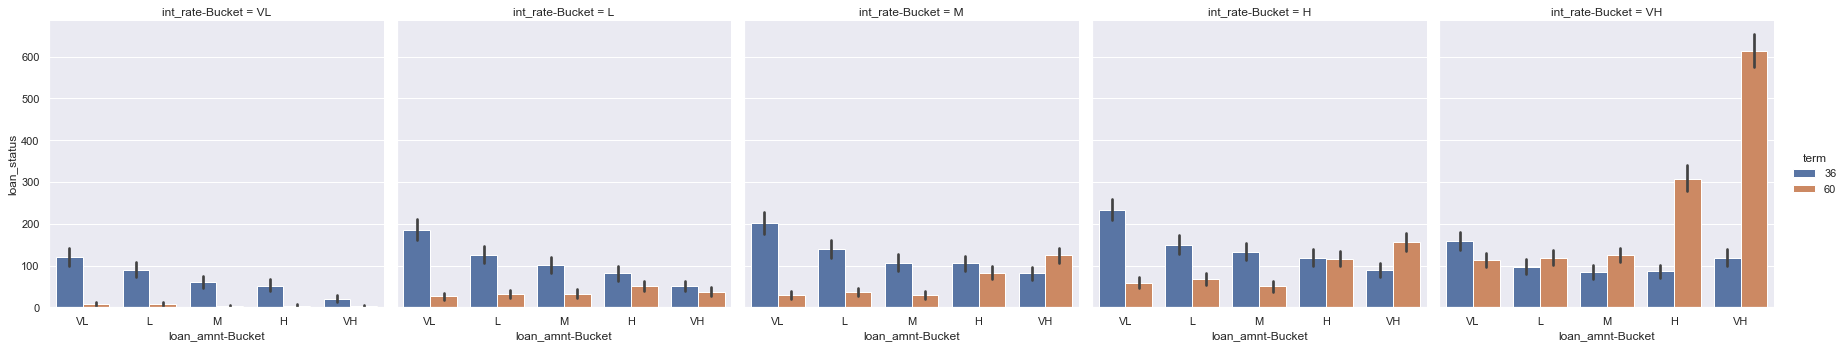

In [137]:
#Check the relation between loan_amt, term and interest rate
sns.catplot(data = loan_data, x = 'loan_amnt-Bucket', y= 'loan_status', hue = 'term', col = 'int_rate-Bucket', kind = 'bar', estimator = np.sum )

if an applicant has applied for a loan amount greater than medium and the associated interest rate is very high, then it is very much likely that the person will become a defaulter if the chosen payment plan is of 60 months

#### Conclusions: 

1. For Loan term as 60, we see a higher chance of default with ~ 25% of loans defaulting. 


2. As the Grade/Subgrade of the loan changes from 'A' to 'G' the chance of default also increases.


3. Grade E , F , G seems to be shows more defaulters than any other Grades.


4. Loans for which the income is Verified have marginally more defaults. 


5. Maximum number of defaults happen in “small businesses” ~ 27% of loans are defaulted.


6. Higher loan amounts with higher term and high interest rates are more likelty to default.


7. As interest rate increases, the chances of default also increases with ~26% of loans are defaulting when interest rate is very high.



8. As bankruptcies record increases from 0.0 to 1.0 , the chances of default also increases with ~ 22% of loans are defaulting having bankruptcies record as 1.0.


9. For High and Very High values of DTI, the defaulting chances increases.


10. For low annual income, we see a marginally more percentage of defaulters with ~18% of loans with very low annual income defaulting.

### Based on EDA analysis,recommended variables to detect defaulters are:

1. Interest Rate
2. Grade / Sub Grade
3. Purpose
4. Term
5. DTI
6. Loan Amount
7. Public bankruptcy records  
8. Annual Income
9. Verification Status